In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1. Implement linear regression (LR) approach using batch gradient descent (BGD),
stochastic gradient descent (SGD), and mini-batch gradient descent (MBGD)
algorithms. Show the cost-function vs. epoch plots for LR with BGD, LR with SGD,
and LR with MBGD models. Show the contour plots for cost function vs. w1 vs. w2
evaluated using LR with BGD, LR with SGD, and LR with MBGD models. For Q1,
the data-q1.xlsx file must be used. The data q1.xlsx file contains two inputs and one
output. You can consider w1 and w2 are the weight values of features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

full_data=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q1.xlsx')

full_data=full_data.values

x_full=full_data[:,[0,1]]
y_full=full_data[:,[2]]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/(np.std(x_full[:,i:i+1]))

y_norm=(y_full-np.mean(y_full))/np.std(y_full)

def cost_func(x,y,w):
  j=0.5/len(x) * np.sum((x@w - y)**2)
  return j

def batch_gradient_descent(x,y,alpha,itr):
  w=np.zeros((x.shape[1],1))
  w_history=[]
  j_history=np.zeros((itr,1))
  for i in range(itr):
    j_history[i]=cost_func(x,y,w)
    w=w - (alpha/len(x)) * x.T @ (x @ w - y)
    w_history.append(w)
  return (j_history,w_history,w)

x=x_norm
y=y_norm

num_iter=1000
cost_values_min,w_history_min,w_min=batch_gradient_descent(x,y,0.01,num_iter)
print('w_min is ',w_min)

w_min is  [[8.37943744e-16]
 [3.47662964e-02]
 [3.02724831e-01]]


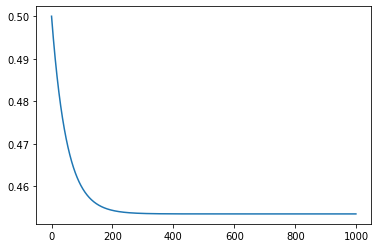

In [ ]:
plt.plot(range(num_iter),cost_values_min)
plt.show()

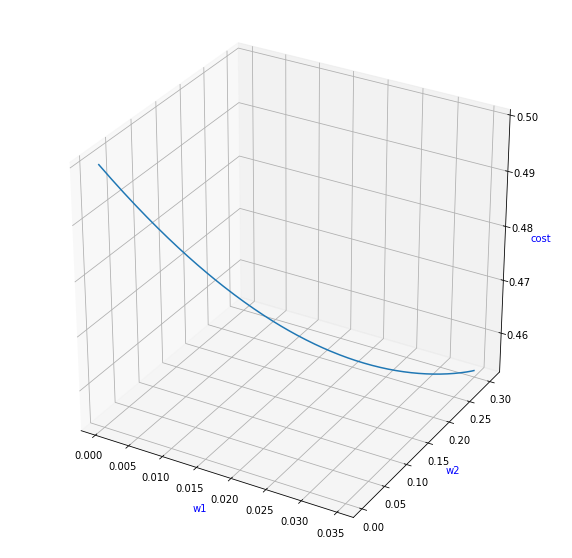

In [ ]:
def make_as_list(cost_values_min,w_history_min):
  l=cost_values_min.flatten().tolist()
  w1_history=[]
  w2_history=[]
  for i in range(len(w_history_min)):
    w1_history.append(w_history_min[i][1])
    w2_history.append(w_history_min[i][2])
  return w1_history,w2_history,l

w1_history,w2_history,l=make_as_list(cost_values_min,w_history_min)

def plot_3d_fig(w1_history, w2_history,l):
  fig=plt.figure(figsize=[10,10])
  gr = plt.axes(projection='3d')
  gr.plot3D(w1_history, w2_history,l)
  gr.set_xlabel("w1",color="blue")
  gr.set_ylabel("w2",color="blue")
  gr.set_zlabel("cost",color="blue")

plot_3d_fig(w1_history, w2_history,l)

In [ ]:
def func(w1_model,w2_model):
  mse=0
  for i in range(len(x)):
    mse=mse+(w_min[0][0]+x[i][1]*w1_model+x[i][2]*w2_model - y[i][0])**2
  return mse*0.5/len(x)

w1_model = np.linspace(-1,1,1000)
w2_model = np.linspace(-1,1,1000)
w1_arr,w2_arr= np.meshgrid(w1_model,w2_model)
z= func(w1_arr,w2_arr)

Text(0, 0.5, 'w2')

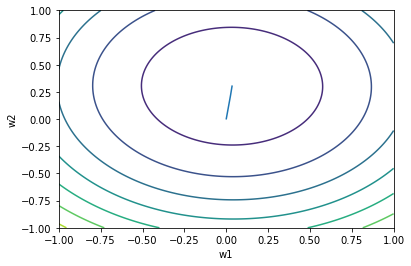

In [ ]:
plt.contour(w1_arr,w2_arr,z)

plt.plot(w1_history,w2_history)
plt.xlabel('w1')
plt.ylabel('w2')

In [ ]:
def SGD(x,y,w,alpha,iter):
  j_history=np.zeros(iter)
  w_history=[]
  for i in range(iter):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    h=x@w - y
    w=w-alpha*(ind_x.T @ h[rand_index:rand_index+1])
    j_history[i]=cost_func(x,y,w)
    w_history.append(w)
  return (j_history,w_history,w)

w=np.zeros((x.shape[1],1))
num_iter=2000
cost_values_min,w_history_min,w_min=SGD(x,y,w,0.001,num_iter)
print('w_min is ',w_min)

w_min is  [[-0.03460744]
 [ 0.03738859]
 [ 0.27142654]]


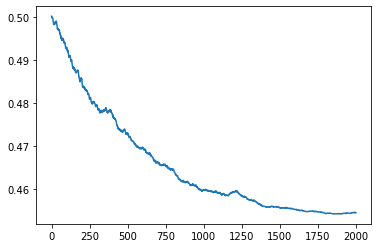

In [ ]:
plt.plot(range(num_iter),cost_values_min)
plt.show()

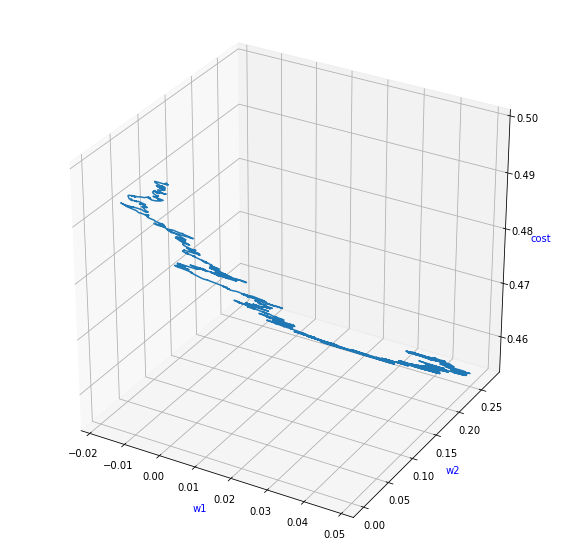

In [ ]:
w1_history,w2_history,l=make_as_list(cost_values_min,w_history_min)
plot_3d_fig(w1_history, w2_history,l)

Text(0, 0.5, 'w2')

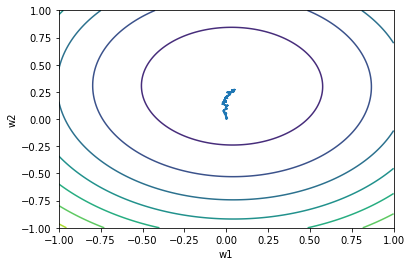

In [ ]:
plt.contour(w1_arr,w2_arr,z)

plt.plot(w1_history,w2_history)
plt.xlabel('w1')
plt.ylabel('w2')

In [ ]:
def MBGD(x,y,w,alpha,iter,batch_size):
  j_history=np.zeros(iter)
  w_history=[]
  for i in range(iter):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    w=w-alpha/batch_size*(ind_x.T @ (ind_x@w -ind_y))
    j_history[i]=cost_func(x,y,w)
    w_history.append(w)
  return (j_history,w_history,w)

num_iter=1500
w=np.zeros((x.shape[1],1))
cost_values_min,w_history_min,w_min=MBGD(x,y,w,0.001,num_iter,15)
print('w_min is ',w_min)

w_min is  [[-0.08325579]
 [ 0.03050112]
 [ 0.27179984]]


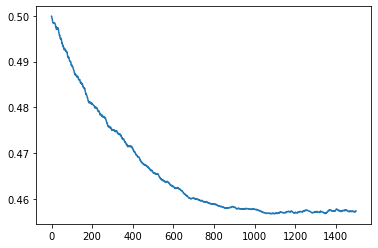

In [ ]:
plt.plot(range(num_iter),cost_values_min)
plt.show()

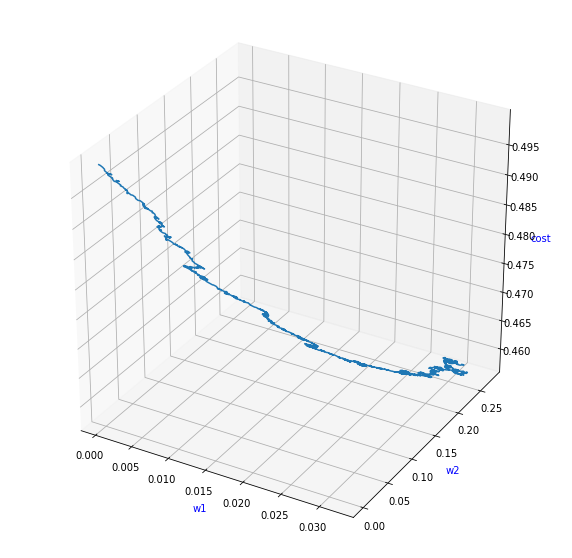

In [ ]:
w1_history,w2_history,l=make_as_list(cost_values_min,w_history_min)
plot_3d_fig(w1_history, w2_history,l)

Text(0, 0.5, 'w2')

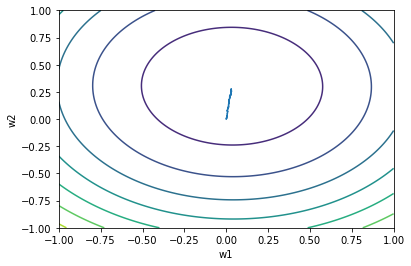

In [ ]:
plt.contour(w1_arr,w2_arr,z)

plt.plot(w1_history,w2_history)
plt.xlabel('w1')
plt.ylabel('w2')

Q2.Implement linear regression with the L2-norm regularization (Ridge regression)
approach using BGD, SGD, and MBGD algorithms. The ridge regression model
weight parameters must be evaluated from the training data. After evaluating the
weight parameters, evaluate the predicted output for the parameters, evaluate the
predicted output for the test feature vectors. For Q2, the data_q2_q3.xlsx file must be
used. Evaluate the mean square error (MSE), mean absolute error (MAE), and
correlation coefficient (CC) by comparing the actual test output and predicted test
output for ridge regression models with BGD, SGD, and MBGD algorithms. You can
use grid search to evaluate the optimal parameters of the model. You can divide the
dataset into training, validation, and testing using hold-out cross-validation (70%
(training), 10% (validation), and 20% (testing)).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q2_q3.xlsx')

full=full.values
np.random.shuffle(full)

x_full=full[:,0:4]
y_full=full[:,4:5]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

y_norm=(y_full[:,0:1]-np.mean(y_full))/np.std(y_full)

def divide_tr_te_2(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
y_te_store=(y_te*np.std(y_full))+np.mean(y_full)   #denormalised y_te

def calc_cost_func(x,y,w):
  j=1/(2*len(x)) * np.sum(((x @ w) - y)**2)
  return j

def calc_cost_func_ridge(x,y,w,l):
  j=calc_cost_func(x,y,w)+(0.5/len(x))*l*(np.sum(np.square(w))) 
  return j

def batch_gradient_descent_2(x,y,w,alpha,l,itr):
  j_history=np.zeros((itr,1))
  for i in range(itr):
    w=w*(1-alpha*l) - (alpha/len(x))*(x.T@(x@w - y))
    j_history[i]=calc_cost_func_ridge(x,y,w,l)

  return w,j_history

l_arr=np.arange(0.1,1.1,0.1)
alpha_arr=np.arange(0.001,0.02,0.001)
c=np.zeros((len(alpha_arr),len(l_arr)))
w_arr=[]
for i in range(len(alpha_arr)):
  for j in range(len(l_arr)):
    c[i][j]=float('inf')
break_=False
for alpha in range(len(alpha_arr)):
  for i in range(len(l_arr)):
    w=np.zeros((x_tr.shape[1],1))
    w,j_history=batch_gradient_descent_2(x_tr,y_tr,w,alpha_arr[alpha],l_arr[i],2000)
    if j_history[-1]>j_history[0]:
      # print("cost is increasing")
      break_=True
      break
    c[alpha][i]=calc_cost_func_ridge(x_va,y_va,w,l_arr[i])
    w_arr.append(w)  
  if(break_):
    break

result = np.where(c == np.amin(c))
listOfCordinates = list(zip(result[0], result[1]))
index=listOfCordinates[0]

w_min=w_arr[index[0]*len(l_arr) + index[1]]

# print('best alpha is ',alpha_arr[index[0]])
# print('best lambda is ',l_arr[index[1]])
# print('minimum cost is ',c[index[0]][index[1]])
print('w_min is ',w_min)

def print_results(w_min):
  y_predicted=np.zeros((x_te.shape[0],w_min.shape[1]))
  y_predicted=(x_te @ w_min)

  y_predicted=(y_predicted*np.std(y_full))+np.mean(y_full)

  y_te=y_te_store
  mse=0
  mae=0
  mse=1/y_te.shape[0] * np.sum((y_predicted-y_te)**2)
  mae=1/(y_te.shape[0]) * np.sum(abs((y_predicted-y_te)))
  def cc_func(y_te,y_pr):
    num= np.sum((y_te-np.mean(y_pr)) * (y_pr-np.mean(y_te)))
    den=math.pow(np.sum( (y_te-np.mean(y_pr))**2 ),0.5)*math.pow(np.sum( (y_pr-np.mean(y_te))**2 ),0.5)
    return num/den
  cc=cc_func(y_te,y_predicted)
  print('Mean Square Error is ',mse)
  print('Mean Absolute Error is ',mae)
  print('correlation coefficient is ',cc)

print_results(w_min)

w_min is  [[-0.00368258]
 [ 0.57753864]
 [ 0.08326551]
 [ 0.07510523]
 [ 0.23234059]]
Mean Square Error is  0.15778250368962593
Mean Absolute Error is  0.32498106664672716
correlation coefficient is  0.719548765381614


Stochastic Gradient Descent

In [ ]:
def stochastic_gradient_descent_2(df,dfY,w,alpha,l,iter):
  for i in range(iter):
    rand_index=random.randint(0,len(df)-1)
    x_temp=df[rand_index:rand_index+1]
    y_temp=dfY[rand_index:rand_index+1]
    w=w*(1-alpha*l)-(alpha)*(x_temp.T @ (x_temp@w - y_temp))
  return w

l_arr=np.arange(0.1,1,0.1)
alpha_arr=np.arange(0.001,0.1,0.001)
c=np.zeros((len(alpha_arr),len(l_arr)))
w_arr=[]
for alpha in range(len(alpha_arr)):
  for i in range(len(l_arr)):
    w=np.zeros((x_tr.shape[1],1))
    w=stochastic_gradient_descent_2(x_tr,y_tr,w,alpha_arr[alpha],l_arr[i],500)
    c[alpha][i]=calc_cost_func_ridge(x_va,y_va,w,l_arr[i])
    w_arr.append(w)
    
result = np.where(c == np.amin(c))
listOfCordinates = list(zip(result[0], result[1]))
index=listOfCordinates[0]
w_min=w_arr[index[0]*len(l_arr) + index[1]]
# print('best alpha is ',alpha_arr[index[0]])
# print('lambda is ',l_arr[index[1]])
# print('minimum cost was ',c[index[0]][index[1]])
print('w_min is ',w_min)

print_results(w_min)

w_min is  [[-0.02658516]
 [ 0.84208332]
 [ 0.14526723]
 [ 0.01354207]
 [ 0.42171514]]
Mean Square Error is  0.16923096845326072
Mean Absolute Error is  0.29232683800748827
correlation coefficient is  0.6748808392780342


Mini-Batch Gradient Descent

In [ ]:
def mini_batch_gradient_descent_2(x,y,w,alpha,lam,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    w=w*(1-alpha*lam) - (alpha/batch_size)*(ind_x.T@(ind_x@w - ind_y))
  return w

l_arr=np.arange(0.1,1,0.1)
alpha_arr=np.arange(0.001,0.1,0.001)
c=np.zeros((len(alpha_arr),len(l_arr)))
w_arr=[]

for alpha in range(len(alpha_arr)):
  for i in range(len(l_arr)):
    w=np.zeros((x_tr.shape[1],1))
    w=mini_batch_gradient_descent_2(x_tr,y_tr,w,alpha_arr[alpha],l_arr[i],500,20)
    c[alpha][i]=calc_cost_func_ridge(x_va,y_va,w,l_arr[i])
    w_arr.append(w)

result = np.where(c == np.amin(c))
listOfCordinates = list(zip(result[0], result[1]))
index=listOfCordinates[0]
w_min=w_arr[index[0]*len(l_arr) + index[1]]
# print('best alpha is ',alpha_arr[index[0]])
# print('lambda is ',l_arr[index[1]])
# print('minimum cost was ',c[index[0]][index[1]])
print('w_min is ',w_min)

print_results(w_min)

w_min is  [[-0.03252237]
 [ 0.60925042]
 [ 0.13443236]
 [ 0.11568078]
 [ 0.22636344]]
Mean Square Error is  0.16801875313393505
Mean Absolute Error is  0.33877256923226073
correlation coefficient is  0.6790051828887842


Q3.Repeat question no. Q2 using least angle regression models with BGD, SGD, and
MBGD algorithms. Evaluate MSE, MAE, and CC values for the test data. You can use
grid search to evaluate the optimal parameters of the models. You can divide the
dataset into training, validation, and testing using hold-out cross-validation (70%
(training), 10% (validation), and 20% (testing)). For Q3, the data_q2_q3.xlsx file
must be used.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q2_q3.xlsx')

full=full.values
np.random.shuffle(full)

x_full=full[:,0:4]
y_full=full[:,4:5]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

y_norm=(y_full[:,0:1]-np.mean(y_full))/np.std(y_full)

def divide_tr_te_2(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
y_te_store=np.copy(y_te)   #denormalised y_te

def calc_cost_func(x,y,w):
  j=1/(2*len(x)) * np.sum(((x @ w) - y)**2)
  return j

def calc_cost_func_l1(x,y,w,l):
  j=0
  for i in range(len(w)):
    j=j+(l/2)*abs(w[i][0])
  j=j+calc_cost_func(x,y,w)
  return j

def batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  j_history=np.zeros((itr,1))
  for i in range(itr):
    h=x@w
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) + alpha*lam_l1/2
    j_history[i]=calc_cost_func(x,y,w)
  return j_history,w

l_arr=np.arange(0.1,1,0.01)
alpha_arr=np.arange(0.0001,0.001,0.0001)
c=np.zeros((len(alpha_arr),len(l_arr)))
w_arr=[]
for i in range(len(alpha_arr)):
  for j in range(len(l_arr)):
    c[i][j]=float('inf')
break_=False
for alpha in range(len(alpha_arr)):
  # print('for alpha ',alpha_arr[alpha])
  for i in range(len(l_arr)):
    w=np.zeros((x_tr.shape[1],1))
    j_history,w=batch_gradient_descent_l1(x_tr,y_tr,w,alpha_arr[alpha],l_arr[i],500)
    if j_history[1]>j_history[0]:
      break_=True
      break
    c[alpha][i]=calc_cost_func(x_va,y_va,w)
    w_arr.append(w)
  if(break_):
    break

result = np.where(c == np.amin(c))
listOfCordinates = list(zip(result[0], result[1]))
index=listOfCordinates[0]

w_min=w_arr[index[0]*len(l_arr) + index[1]]

# print('alpha is ',alpha_arr[index[0]])
# print('lambda is ',l_arr[index[1]])
# print('minimum cost is ',c[index[0]][index[1]])
print('w_min is ',w_min)

def print_errors(x_te,y_te,w_min):
  y_predicted=np.zeros((x_te.shape[0],w_min.shape[1]))
  y_predicted=(x_te @ w_min)

  y_predicted=(y_predicted*np.std(y_full))+np.mean(y_full)

  y_test=(y_te*np.std(y_full))+np.mean(y_full)
  mse=0
  mae=0
  mse=1/(y_test.shape[0]) * np.sum((y_predicted-y_test)**2)
  mae=1/y_test.shape[0] * np.sum(abs((y_predicted-y_test)))
  def cc_func(y_test,y_pr):
    num= np.sum((y_test-np.mean(y_pr)) * (y_pr-np.mean(y_test)))
    den=math.pow(np.sum( (y_test-np.mean(y_pr))**2 ),0.5)*math.pow(np.sum( (y_pr-np.mean(y_test))**2 ),0.5)
    return num/den

  cc=cc_func(y_test,y_predicted)
  print('mean square error is ',mse)
  print('mean absolute error is ',mae)
  print('correlation coefficient is ',cc)

print_errors(x_te,y_te,w_min)

w_min is  [[ 0.03324603]
 [ 0.6404457 ]
 [-0.04723293]
 [ 0.05090554]
 [ 0.26909256]]
mean square error is  0.1660550013345807
mean absolute error is  0.3357663327254936
correlation coefficient is  0.7890381234224434


Stochastic Gradient Descent

In [ ]:
def stochastic_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  j_history=np.zeros((itr,1))
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    h=ind_x@w
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) + alpha*lam_l1/2
    j_history[i]=calc_cost_func(x,y,w)
  return w,j_history

l_arr=np.arange(0.1,1,0.1)
alpha_arr=np.arange(0.001,0.01,0.001)
c=np.zeros((len(alpha_arr),len(l_arr)))
w_arr=[]

for alpha in range(len(alpha_arr)):
  for i in range(len(l_arr)):
    w=np.zeros((x_tr.shape[1],1))
    w,j_history=stochastic_gradient_descent_l1(x_tr,y_tr,w,alpha_arr[alpha],l_arr[i],500)
    c[alpha][i]=calc_cost_func(x_va,y_va,w)
    w_arr.append(w)

result = np.where(c == np.amin(c))
listOfCordinates = list(zip(result[0], result[1]))
index=listOfCordinates[0]
w_min=w_arr[index[0]*len(l_arr) + index[1]]

# print(alpha_arr[index[0]])
# print(l_arr[index[1]])
# print(c[index[0]][index[1]])
print('w_min is ',w_min)

print_errors(x_te,y_te,w_min)

w_min is  [[ 0.02173409]
 [ 0.59506768]
 [-0.00826779]
 [ 0.02181473]
 [ 0.2658168 ]]
mean square error is  0.16868186872623822
mean absolute error is  0.336434121320378
correlation coefficient is  0.7987600815911211


Mini-Batch Gradient Descent

In [ ]:
def mini_batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr,batch_size):
  j_history=np.zeros((itr,1))
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (ind_x@w-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (ind_x@w-ind_y)) + alpha*lam_l1/2
    j_history[i]=calc_cost_func(x,y,w)
  return w,j_history

l_arr=np.arange(0.1,1,0.1)
alpha_arr=np.arange(0.0001,0.001,0.0001)
c=np.zeros((len(alpha_arr),len(l_arr)))
w_arr=[]

for alpha in range(len(alpha_arr)):
  for i in range(len(l_arr)):
    w=np.zeros((x_tr.shape[1],1))
    w,j_history=mini_batch_gradient_descent_l1(x_tr,y_tr,w,alpha_arr[alpha],l_arr[i],500,20)
    c[alpha][i]=calc_cost_func(x_va,y_va,w)
    w_arr.append(w)

result = np.where(c == np.amin(c))
listOfCordinates = list(zip(result[0], result[1]))
index=listOfCordinates[0]
w_min=w_arr[index[0]*len(l_arr) + index[1]]

# print(alpha_arr[index[0]])
# print(l_arr[index[1]])
# print(c[index[0]][index[1]])
print('w_min is ',w_min)

print_errors(x_te,y_te,w_min)

w_min is  [[-0.02566598]
 [ 0.65956462]
 [-0.04574358]
 [ 0.04417096]
 [ 0.28992856]]
mean square error is  0.16146455763552692
mean absolute error is  0.3237402618033627
correlation coefficient is  0.7997486291371495


Q4. Implement logistic regression (LOR), LOR with L2-norm regularization, and LOR
with L1-norm regularization models using BGD, SGD, and MBGD algorithms. The
dataset in data_q4_q5.xlsx contains 30 features and one output. The class label ‘M’
stands for malignant, and ‘B’ is the Benign class. You must use hold-out
cross-validation ((CV) with 70% as training, 10% as validation and 20% as testing) to
evaluate training, validation, and testing instances for each model. Evaluate the
performance of each model using accuracy, sensitivity, and specificity measures.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

import warnings
warnings.filterwarnings('ignore')

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q4_q5.xlsx')

full=full.values
np.random.shuffle(full)

x_full=full[:,0:30]
y_full=full[:,30:31]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])
y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
for i in range(len(y_full)):
  if y_full[i]=='M':
    y_norm[i]=1

def divide_tr_te_2(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
y_te_store=np.copy(y_te)

def g(x,w):
  z = 1/(1 + np.exp(-1*(x @ w)[0]))
  return z

def sigmoid(x):
  return 1/(1+np.exp(-x))

def cost(y_pred,y):
  c=(-1/len(y)) * (np.sum((y*np.log(y_pred)) + (1-y)*np.log(1-y_pred)))
  return c

def batch_gradient_descent(x,y,w,alpha,itr):
  costs=np.zeros((itr,1))
  for i in range(itr):
    temp=sigmoid(x@w)
    w=w - (alpha/len(y))*(x.T@(temp-y))
    costs[i]=cost(temp,y)
    w=w.astype(float)
  return w,costs

alpha_vals=np.arange(0.01,0.1,0.01)
costs=np.ones(len(alpha_vals))
diff=np.zeros(len(alpha_vals))
diff_min=float('inf')
w_arr=[]
for j in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[j])
  w=np.zeros((x_tr.shape[1],1),dtype=float)
  w,j_his=batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
  if j_his[-1]<0 or math.isnan(j_his[-1]):
    break
  w_arr.append(w)
  y_pred=sigmoid(x_va@w)
  costs[j]=cost(y_pred,y_va)
  for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
  A=abs(y_pred-y_va)
  diff[j]=np.sum(A)
  if(diff[j]<diff_min):
    diff_min=diff[j]
    j_min=j
    w_min=w
  elif(diff[j]==diff_min and costs[j]<costs[j_min]):
    diff_min=diff[j]
    j_min=j
    w_min=w
# print('min cost is ',costs[j_min])
# print('alpha is ',alpha_vals[j_min])
print('w_min is ',w_min)

def test_result(x_te,y_te,w):
  y_pred=sigmoid(x_te@w)
  for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
      y_pred[i]=1
    else:
      y_pred[i]=0
  
  tn=0
  fp=0
  fn=0
  tp=0
  for i in range(len(y_pred)):
    if y_pred[i]==1:
      if y_te[i]==1:
        tp+=1
      else:
        fp+=1
    else:
      if y_te[i]==1:
        fn+=1
      else:
        tn+=1

  accuracy=(tp+tn)/(len(y_te)) * 100
  sen=tp/(tp+fn) * 100
  spe=tn/(tn+fp) * 100
  print('accuracy is ',accuracy)
  print('sensitivity is ',sen)
  print('specificity is ',spe)

test_result(x_te,y_te,w_min)

w_min is  [[-0.36358101]
 [ 0.39445224]
 [ 0.33934655]
 [ 0.39015085]
 [ 0.39184452]
 [ 0.14487743]
 [ 0.15206143]
 [ 0.30898892]
 [ 0.38744775]
 [ 0.13454067]
 [-0.16490375]
 [ 0.36515577]
 [ 0.00687244]
 [ 0.31188946]
 [ 0.3307275 ]
 [-0.03147352]
 [-0.110974  ]
 [-0.06880258]
 [ 0.02829981]
 [-0.06514532]
 [-0.19451806]
 [ 0.46444868]
 [ 0.41543984]
 [ 0.4463859 ]
 [ 0.43928116]
 [ 0.28588864]
 [ 0.1898732 ]
 [ 0.27205606]
 [ 0.36898917]
 [ 0.27691677]
 [ 0.070222  ]]
accuracy is  98.24561403508771
sensitivity is  95.83333333333334
specificity is  100.0


LOR with L2-norm regularisation using BGD 

In [7]:
def batch_gradient_descent_l2(x,y,w,alpha,lam,itr):
  for i in range(itr):
    temp=sigmoid(x@w)
    w=w*(1-alpha*lam) - (alpha)*(x.T@(temp-y))
    w=w.astype(float)
  return w

num_iter=1000
alpha_vals=np.arange(0.0001,0.001,0.0001)
lam=np.linspace(0.1,1,10)
diff=np.zeros((9,10))
costs=np.zeros((9,10))
diff_min=float('inf')
cost_min=float('inf')
lam_min=0
x_tr=x_tr.astype(float)
x_va=x_va.astype(float)

for a in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[a])
  for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
      y_pred=sigmoid(x_va@w)
      c=cost(y_pred,y_va)
      if(math.isnan(c) or math.isinf(c) or c<0):
        costs[a][j]=10000        
        # print('cost is not appropriate',c)
        break
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
# print('alpha is ',a_min)
print('w_min is ',w_min)

test_result(x_te,y_te,w_min)

w_min is  [[-0.47156815]
 [ 0.51849331]
 [ 0.52967206]
 [ 0.50921958]
 [ 0.52815745]
 [ 0.18714485]
 [ 0.12802004]
 [ 0.49433681]
 [ 0.56690439]
 [ 0.17804062]
 [-0.27801478]
 [ 0.60281996]
 [ 0.01306936]
 [ 0.48024389]
 [ 0.52036711]
 [-0.0425262 ]
 [-0.30151067]
 [-0.10408297]
 [-0.00719203]
 [-0.13690145]
 [-0.40540134]
 [ 0.68294589]
 [ 0.73053488]
 [ 0.64080621]
 [ 0.65029298]
 [ 0.46796406]
 [ 0.20150208]
 [ 0.44885304]
 [ 0.52992348]
 [ 0.45436794]
 [ 0.08675431]]
accuracy is  97.36842105263158
sensitivity is  93.75
specificity is  100.0


BGD with L1 norm

In [8]:
def batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  for i in range(itr):
    h=sigmoid(x@w)
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) + alpha*lam_l1/2
  w=w.astype(float)
  return w

num_iter=1000
alpha_vals=np.arange(0.002,0.01,0.001)
lam=np.linspace(0.1,1,10)
diff=np.zeros((len(alpha_vals),len(lam)))
costs=np.zeros((len(alpha_vals),len(lam)))
diff_min=float('inf')
cost_min=float('inf')
lam_min=0
x_tr=x_tr.astype(float)
x_va=x_va.astype(float)
alpha_min=0

for a in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[a])
  for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
      y_pred=sigmoid(x_va@w)
      c=cost(y_pred,y_va)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
# print('alpha is ',a_min)
print('w_min is ',w_min)

test_result(x_te,y_te,w_min)

w_min is  [[-1.37846920e-01]
 [-6.13399555e-04]
 [ 1.61588573e-01]
 [ 6.84447931e-04]
 [ 1.91892421e-01]
 [-3.46689180e-04]
 [-9.84777519e-05]
 [ 1.46940981e+00]
 [ 1.19728777e+00]
 [ 1.40504260e-03]
 [-1.40838614e-03]
 [ 1.78725897e+00]
 [-4.35758149e-01]
 [ 4.74855353e-01]
 [ 1.28225783e+00]
 [-9.22086799e-04]
 [-6.70366110e-01]
 [-1.12142654e-03]
 [-1.10460943e-03]
 [-4.91612604e-02]
 [-1.46304527e+00]
 [ 1.73265031e+00]
 [ 2.09386471e+00]
 [ 1.33924022e+00]
 [ 1.62985049e+00]
 [ 5.02982001e-01]
 [-7.11836917e-04]
 [ 9.43373878e-01]
 [ 9.20039835e-01]
 [ 5.71286606e-01]
 [ 9.17772265e-02]]
accuracy is  97.36842105263158
sensitivity is  95.83333333333334
specificity is  98.48484848484848


Mini-Batch Gradient Descent

In [9]:
def mini_batch_gradient_descent(x,y,w,alpha,itr,batch_size):

  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    w=w-alpha/batch_size*(ind_x.T @ (temp_batch -ind_y))
  w=w.astype(float)
  return w

alpha_vals=np.arange(0.001,0.01,0.001)
costs=np.zeros(50)
diff=np.zeros(50)
diff_min=float('inf')
w_arr=[]
for j in range(len(alpha_vals)):
  w=np.zeros((x_tr.shape[1],1),dtype=float)
  w=mini_batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000,10)
  w_arr.append(w)
  y_pred=sigmoid(x_va@w)
  costs[j]=cost(y_pred,y_va)
  for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
  A=abs(y_pred-y_va)
  diff[j]=np.sum(A)
  if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
    diff_min=diff[j]
    j_min=j
    w_min=w
# print(costs[j_min])
# print(alpha_vals[j_min])
print('w_min is ',w_min)

test_result(x_te,y_te,w_min)

w_min is  [[-0.37098251]
 [ 0.37514406]
 [ 0.31792761]
 [ 0.37161658]
 [ 0.3769831 ]
 [ 0.16216428]
 [ 0.15090814]
 [ 0.30051621]
 [ 0.38758242]
 [ 0.12402754]
 [-0.14278468]
 [ 0.35143218]
 [-0.0009094 ]
 [ 0.29886672]
 [ 0.32031947]
 [-0.01542231]
 [-0.11770962]
 [-0.08450083]
 [ 0.02218613]
 [-0.06487985]
 [-0.19322115]
 [ 0.44478984]
 [ 0.39544069]
 [ 0.42744774]
 [ 0.42361551]
 [ 0.29735348]
 [ 0.18206916]
 [ 0.25149442]
 [ 0.36241239]
 [ 0.26515836]
 [ 0.07286669]]
accuracy is  97.36842105263158
sensitivity is  93.75
specificity is  100.0


MBGD with L2

In [10]:
def mini_batch_gradient_descent_l2(x,y,w,alpha,lam,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    w=w*(1-alpha*lam) - (alpha/batch_size)*(ind_x.T@(temp_batch-ind_y))
  w=w.astype(float)
  return w

num_iter=1000
alpha_vals=np.arange(0.001,0.01,0.001)
lam=np.linspace(0.1,1,10)
diff=np.zeros((9,10))
costs=np.zeros((9,10))
diff_min=float('inf')
cost_min=float('inf')
lam_min=0
x_tr=x_tr.astype(float)
x_va=x_va.astype(float)

for a in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[a])
  for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=mini_batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
      y_pred=sigmoid(x_va@w)
      c=cost(y_pred,y_va)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
# print('alpha is ',a_min)
print('w_min is ',w_min)

test_result(x_te,y_te,w_min)

w_min is  [[-0.26445561]
 [ 0.27937147]
 [ 0.21783399]
 [ 0.27715431]
 [ 0.27730426]
 [ 0.11054232]
 [ 0.11869604]
 [ 0.21998914]
 [ 0.28056042]
 [ 0.09910981]
 [-0.10694281]
 [ 0.25510661]
 [ 0.00165298]
 [ 0.21708117]
 [ 0.2302977 ]
 [-0.01583402]
 [-0.05035845]
 [-0.03634774]
 [ 0.03737415]
 [-0.03426282]
 [-0.11337379]
 [ 0.32207547]
 [ 0.26587499]
 [ 0.31189443]
 [ 0.30518839]
 [ 0.19458929]
 [ 0.14360983]
 [ 0.19033461]
 [ 0.26491887]
 [ 0.18182811]
 [ 0.05636469]]
accuracy is  96.49122807017544
sensitivity is  93.75
specificity is  98.48484848484848


MBGD with L1 norm 

In [11]:
def mini_batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-(alpha/batch_size)*(ind_x[:,j:j+1].T @ (temp_batch-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-(alpha/batch_size)*(ind_x[:,j:j+1].T @ (temp_batch-ind_y)) + alpha*lam_l1/2

  w=w.astype(float)
  return w

num_iter=1000
alpha_vals=np.arange(0.001,0.01,0.001)
lam=np.linspace(0.1,1,10)
diff=np.zeros((len(alpha_vals),len(lam)))
costs=np.zeros((len(alpha_vals),len(lam)))
diff_min=float('inf')
cost_min=float('inf')
lam_min=0
x_tr=x_tr.astype(float)
x_va=x_va.astype(float)
alpha_min=0

for a in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[a])
  for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=mini_batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
      y_pred=sigmoid(x_va@w)
      c=cost(y_pred,y_va)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
# print('alpha is ',a_min)
print('w_min is ',w_min)

test_result(x_te,y_te,w_min)

w_min is  [[-2.19427835e-01]
 [ 2.11786832e-01]
 [ 8.16014187e-02]
 [ 2.17339790e-01]
 [ 2.02871151e-01]
 [ 2.04696005e-03]
 [ 3.12322480e-04]
 [ 1.60949829e-01]
 [ 2.74789894e-01]
 [ 2.61359148e-03]
 [ 1.92265864e-03]
 [ 1.42444941e-01]
 [ 9.43674237e-04]
 [ 8.29873401e-02]
 [ 9.14163108e-02]
 [ 1.18625220e-03]
 [ 4.71192318e-04]
 [ 6.83580086e-04]
 [ 1.81207696e-04]
 [ 5.02598235e-04]
 [ 7.89130636e-04]
 [ 3.14848600e-01]
 [ 1.84456508e-01]
 [ 3.03965546e-01]
 [ 2.71799460e-01]
 [ 1.16213532e-01]
 [ 4.33825573e-02]
 [ 1.25418996e-01]
 [ 2.64106765e-01]
 [ 8.59688753e-02]
 [ 1.59366922e-03]]
accuracy is  98.24561403508771
sensitivity is  95.83333333333334
specificity is  100.0


Stochastic Gradient Descent

In [12]:
def stochastic_gradient_descent(x,y,w,alpha,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    temp=sigmoid(ind_x@w)
    w=w-alpha*(ind_x.T @ (temp -ind_y))
  w=w.astype(float)
  return w

alpha_vals=np.arange(0.01,0.5,0.01)
costs=np.zeros(len(alpha_vals))
diff=np.zeros(len(alpha_vals))
diff_min=float('inf')
w_arr=[]
for j in range(len(alpha_vals)):
  w=np.zeros((x_tr.shape[1],1),dtype=float)
  w=stochastic_gradient_descent(x_tr,y_tr,w,alpha_vals[j],2000)
  w_arr.append(w)
  y_pred=sigmoid(x_va@w)
  costs[j]=cost(y_pred,y_va)
  if costs[j]<0 or np.isnan(costs[j]):
    continue
  for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
  A=abs(y_pred-y_va)
  diff[j]=np.sum(A)
  if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
    diff_min=diff[j]
    j_min=j
    w_min=w

# print(costs[j_min])
# print(alpha_vals[j_min])
print('w_min is ',w_min)

test_result(x_te,y_te,w_min)

w_min is  [[-0.65041569]
 [ 0.55976367]
 [ 0.67534864]
 [ 0.54252855]
 [ 0.57400681]
 [ 0.36534469]
 [ 0.13738975]
 [ 0.68524496]
 [ 0.78703632]
 [ 0.20204797]
 [-0.23599054]
 [ 1.0290575 ]
 [ 0.03644694]
 [ 0.74285921]
 [ 0.81388999]
 [-0.10889621]
 [-0.48738508]
 [-0.18871906]
 [-0.06277485]
 [-0.4085871 ]
 [-0.6417067 ]
 [ 0.92114883]
 [ 1.04189355]
 [ 0.81659759]
 [ 0.86338897]
 [ 0.66541518]
 [ 0.2846027 ]
 [ 0.70687516]
 [ 0.73383434]
 [ 0.53081138]
 [ 0.21699352]]
accuracy is  96.49122807017544
sensitivity is  93.75
specificity is  98.48484848484848


SGD with L2 norm

In [13]:
def stochastic_gradient_descent_l2(x,y,w,alpha,lam,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    temp=sigmoid(ind_x@w)
    w=w*(1-alpha*lam) - (alpha)*(ind_x.T@(temp-ind_y))
  w=w.astype(float)
  return w

num_iter=800
alpha_vals=np.arange(0.01,1,0.01)
lam=np.arange(0.05,0.3,0.01)
diff=np.zeros((len(alpha_vals),len(lam)))
costs=np.zeros((len(alpha_vals),len(lam)))
diff_min=float('inf')
cost_min=float('inf')
lam_min=0
x_tr=x_tr.astype(float)
x_va=x_va.astype(float)

for a in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[a])
  for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=stochastic_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
      y_pred=sigmoid(x_va@w)
      c=cost(y_pred,y_va)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

print('lambda is ',lam_min)
print('alpha is ',a_min)
print('w_min is ',w_min)

test_result(x_te,y_te,w_min)

lambda is  0.11000000000000001
alpha is  0.74
w_min is  [[-0.71622129]
 [ 0.45635754]
 [ 0.80597295]
 [ 0.48413551]
 [ 0.46328743]
 [ 0.27340944]
 [ 0.40767606]
 [ 0.27666293]
 [ 0.5808675 ]
 [ 0.29316024]
 [-0.36105928]
 [ 0.70360641]
 [-0.02766503]
 [ 0.59640936]
 [ 0.56319388]
 [-0.02466883]
 [-0.15408864]
 [-0.31696234]
 [ 0.32106726]
 [ 0.09349382]
 [-0.30510452]
 [ 0.66128012]
 [ 0.75924901]
 [ 0.64611609]
 [ 0.64397148]
 [ 0.58024177]
 [ 0.30429926]
 [-0.05699459]
 [ 0.66326347]
 [ 0.29155389]
 [-0.06972293]]
accuracy is  96.49122807017544
sensitivity is  93.75
specificity is  98.48484848484848


SGD with L1 norm

In [14]:
def stochastic_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    h=sigmoid(ind_x@w)
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) + alpha*lam_l1/2
    
  w=w.astype(float)
  return w

num_iter=1000
alpha_vals=np.arange(0.01,0.1,0.01)
lam=np.linspace(0.1,1,10)
diff=np.zeros((len(alpha_vals),len(lam)))
costs=np.zeros((len(alpha_vals),len(lam)))
diff_min=float('inf')
cost_min=float('inf')
lam_min=0
x_tr=x_tr.astype(float)
x_va=x_va.astype(float)
alpha_min=0

for a in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[a])
  for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=stochastic_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
      y_pred=sigmoid(x_va@w)
      c=cost(y_pred,y_va)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
# print('alpha is ',a_min)
print('w_min is ',w_min)

test_result(x_te,y_te,w_min)

w_min is  [[-1.58432616e-01]
 [-1.81702108e-03]
 [ 1.31349860e-02]
 [ 5.10051324e-03]
 [ 3.76986142e-03]
 [ 5.71127984e-02]
 [ 6.11622234e-03]
 [ 9.10427239e-02]
 [ 4.59474357e-01]
 [ 6.56362489e-02]
 [ 1.85112788e-02]
 [ 1.68159873e-02]
 [-7.62410241e-03]
 [ 8.94365833e-03]
 [ 1.28665633e-02]
 [ 2.67926980e-03]
 [ 8.11308442e-03]
 [ 9.17514740e-03]
 [ 5.49011020e-03]
 [-1.75411886e-04]
 [ 1.09283568e-02]
 [ 6.00871552e-01]
 [ 4.16304369e-01]
 [ 5.00736598e-01]
 [ 3.31246929e-01]
 [ 2.83481537e-01]
 [ 4.45424606e-02]
 [ 8.28323576e-02]
 [ 5.11330540e-01]
 [ 1.47264219e-01]
 [ 3.64941120e-02]]
accuracy is  97.36842105263158
sensitivity is  95.83333333333334
specificity is  98.48484848484848


Q5.Repeat the Q4 using a 5-fold CV-based selection of training and test instances for each
model. Evaluate the accuracy, sensitivity, and specificity values of LoR,
LoR+L2-norm regularization, LoR+L1-norm regularization models using BGD, SGD,
and MBGD algorithms. You must use the dataset data_q4_q5.xlsx for this question.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

import warnings
warnings.filterwarnings('ignore')

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q4_q5.xlsx')

full=full.values
np.random.shuffle(full)

x_full=full[:,0:30]
y_full=full[:,30:31]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])
y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
for i in range(len(y_full)):
  if y_full[i]=='M':
    y_norm[i]=1

def g(x,w):
  z = 1/(1 + np.exp(-1*(x @ w)[0]))
  return z

def sigmoid(x):
  return 1/(1+np.exp(-x))

def cost(y_pred,y):
  c=(-1/len(y)) * (np.sum((y*np.log(y_pred)) + (1-y)*np.log(1-y_pred)))
  return c

def batch_gradient_descent(x,y,w,alpha,itr):
  for i in range(itr):
    temp=sigmoid(x@w)
    w=w - (alpha/len(y))*(x.T@(temp-y))
  w=w.astype(float)
  return w


def test_result(x_te,y_te,w):
  y_pred=sigmoid(x_te@w)
  for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
      y_pred[i]=1
    else:
      y_pred[i]=0
  
  tn=0
  fp=0
  fn=0
  tp=0
  for i in range(len(y_pred)):
    if y_pred[i]==1:
      if y_te[i]==1:
        tp+=1
      else:
        fp+=1
    else:
      if y_te[i]==1:
        fn+=1
      else:
        tn+=1

  accuracy=(tp+tn)/(len(y_te)) * 100
  sen=tp/(tp+fn) * 100
  spe=tn/(tn+fp) * 100
  print('accuracy is ',accuracy)
  print('sensitivity is ',sen)
  print('specificity is ',spe)
  return accuracy,sen,spe

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  alpha_vals=np.arange(0.01,0.2,0.01)
  costs=np.zeros(len(alpha_vals))
  diff=np.zeros(len(alpha_vals))
  diff_min=float('inf')
  w_arr=[]
  for j in range(len(alpha_vals)):
    w=np.zeros((x_tr.shape[1],1),dtype=float)
    w=batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
    w_arr.append(w)
    y_pred=sigmoid(x_tr@w)
    costs[j]=cost(y_pred,y_tr)
    if costs[j]<0 or math.isnan(costs[j]):
      costs[j]=1000
      continue
    for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
    A=abs(y_pred-y_tr)
    diff[j]=np.sum(A)
    if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
      diff_min=diff[j]
      j_min=j
      w_min=w

  # print('alpha is ',alpha_vals[j_min])

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

In [20]:
def divide_tr_te_k_fold(x_norm,y_norm,k):
  batch_size=math.floor(len(x_norm)/k)
  x_norm_k=[]
  y_norm_k=[]
  start=0
  end=batch_size
  for t in range(5):
    if(t==4):
      x_norm_k.append(x_norm[start:])
      y_norm_k.append(y_norm[start:])
    else:
      x_norm_k.append(x_norm[start:end])
      y_norm_k.append(y_norm[start:end])
    start=end
    end=end+batch_size

  return x_norm_k,y_norm_k
  

x_norm_k,y_norm_k=divide_tr_te_k_fold(x_norm,y_norm,5)

def perform():
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for z in range(len(x_norm_k)):
    print('for fold ',z+1)
    x_te=x_norm_k[z]
    y_te=y_norm_k[z]
    is_x_tr_defined=False
    for q in range(len(x_norm_k)):
      if (z==q):
        continue
      if not is_x_tr_defined:
        x_tr=x_norm_k[q]
        y_tr=y_norm_k[q]
        is_x_tr_defined=True
      else:
        x_tr=np.concatenate((x_tr,x_norm_k[q]),axis=0)
        y_tr=np.concatenate((y_tr,y_norm_k[q]),axis=0)
    accuracy,sen,spe=calc_acc_sen_spe(x_tr,y_tr,x_te,y_te)
    acc_arr.append(accuracy)
    sen_arr.append(sen)
    spe_arr.append(spe)
  print('average accuracy is ',sum(acc_arr)/len(acc_arr))
  print('average sensitivity is ',sum(sen_arr)/len(sen_arr))
  print('average specificity is ',sum(spe_arr)/len(spe_arr))

In [21]:
perform()

for fold  1
accuracy is  100.0
sensitivity is  100.0
specificity is  100.0
for fold  2
accuracy is  99.11504424778761
sensitivity is  97.72727272727273
specificity is  100.0
for fold  3
accuracy is  96.46017699115043
sensitivity is  92.6829268292683
specificity is  98.61111111111111
for fold  4
accuracy is  99.11504424778761
sensitivity is  97.14285714285714
specificity is  100.0
for fold  5
accuracy is  96.58119658119658
sensitivity is  92.5
specificity is  98.7012987012987
average accuracy is  98.25429241358447
average sensitivity is  96.01061133987965
average specificity is  99.46248196248196


BGD with L2 norm

In [22]:
def batch_gradient_descent_l2(x,y,w,alpha,lam,itr):
  for i in range(itr):
    temp=sigmoid(x@w)
    w=w*(1-alpha*lam) - (alpha)*(x.T@(temp-y))
  w=w.astype(float)
  return w

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  num_iter=1000
  alpha_vals=np.arange(0.01,0.1,0.01)
  lam=np.linspace(0.1,1,10)
  diff=np.zeros((len(alpha_vals),len(lam)))
  costs=np.zeros((len(alpha_vals),len(lam)))
  diff_min=float('inf')
  cost_min=float('inf')
  lam_min=0
  x_tr=x_tr.astype(float)
  # x_va=x_va.astype(float)

  for a in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[a])
    for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
      y_pred=sigmoid(x_tr@w)
      c=cost(y_pred,y_tr)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_tr)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

perform()

for fold  1
accuracy is  99.11504424778761
sensitivity is  98.07692307692307
specificity is  100.0
for fold  2
accuracy is  97.34513274336283
sensitivity is  95.45454545454545
specificity is  98.55072463768117
for fold  3
accuracy is  95.57522123893806
sensitivity is  97.5609756097561
specificity is  94.44444444444444
for fold  4
accuracy is  98.23008849557522
sensitivity is  97.14285714285714
specificity is  98.71794871794873
for fold  5
accuracy is  96.58119658119658
sensitivity is  95.0
specificity is  97.40259740259741
average accuracy is  97.36933666137206
average sensitivity is  96.64706025681635
average specificity is  97.82314304053435


BGD with L1

In [23]:
def batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  for i in range(itr):
    h=sigmoid(x@w)
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) + alpha*lam_l1/2
  w=w.astype(float)
  return w

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  num_iter=500
  alpha_vals=np.arange(0.01,0.1,0.01)
  lam=np.linspace(0.1,1,10)
  diff=np.zeros((len(alpha_vals),len(lam)))
  costs=np.zeros((len(alpha_vals),len(lam)))
  diff_min=float('inf')
  # j_min=0
  cost_min=float('inf')
  lam_min=0
  x_tr=x_tr.astype(float)
  # x_va=x_va.astype(float)
  alpha_min=0

  for a in range(len(alpha_vals)):
  # print('for alpha ',alpha_vals[a])
    for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
      y_pred=sigmoid(x_tr@w)
      c=cost(y_pred,y_tr)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_tr)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
  # print('alpha is ',a_min)

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

perform()

for fold  1
accuracy is  99.11504424778761
sensitivity is  98.07692307692307
specificity is  100.0
for fold  2
accuracy is  96.46017699115043
sensitivity is  95.45454545454545
specificity is  97.10144927536231
for fold  3
accuracy is  95.57522123893806
sensitivity is  97.5609756097561
specificity is  94.44444444444444
for fold  4
accuracy is  96.46017699115043
sensitivity is  94.28571428571428
specificity is  97.43589743589743
for fold  5
accuracy is  95.72649572649573
sensitivity is  95.0
specificity is  96.1038961038961
average accuracy is  96.66742303910445
average sensitivity is  96.07563168538778
average specificity is  97.01713745192005


Mini-Batch Gradient Descent

In [24]:
def mini_batch_gradient_descent(x,y,w,alpha,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    w=w-alpha/batch_size*(ind_x.T @ (temp_batch -ind_y))
  w=w.astype(float)
  return w

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  alpha_vals=np.arange(0.01,0.2,0.01)
  costs=np.zeros(len(alpha_vals))
  diff=np.zeros(len(alpha_vals))
  diff_min=float('inf')
  w_arr=[]
  for j in range(len(alpha_vals)):
    w=np.zeros((x_tr.shape[1],1),dtype=float)
    w=mini_batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000,10)
    w_arr.append(w)
    y_pred=sigmoid(x_tr@w)
    costs[j]=cost(y_pred,y_tr)
    for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
    A=abs(y_pred-y_tr)
    diff[j]=np.sum(A)
    if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
      diff_min=diff[j]
      j_min=j
      w_min=w
  # print('alpha is ',alpha_vals[j_min])

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

perform()

for fold  1
accuracy is  100.0
sensitivity is  100.0
specificity is  100.0
for fold  2
accuracy is  97.34513274336283
sensitivity is  93.18181818181817
specificity is  100.0
for fold  3
accuracy is  96.46017699115043
sensitivity is  95.1219512195122
specificity is  97.22222222222221
for fold  4
accuracy is  98.23008849557522
sensitivity is  94.28571428571428
specificity is  100.0
for fold  5
accuracy is  95.72649572649573
sensitivity is  92.5
specificity is  97.40259740259741
average accuracy is  97.55237879131684
average sensitivity is  95.01789673740893
average specificity is  98.92496392496392


MBGD with L2 norm

In [25]:
def mini_batch_gradient_descent_l2(x,y,w,alpha,lam,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    w=w*(1-alpha*lam) - (alpha)*(ind_x.T@(temp_batch-ind_y))
    w=w.astype(float)
  return w

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  num_iter=1000
  alpha_vals=np.arange(0.01,0.1,0.01)
  lam=np.linspace(0.1,1,10)
  diff=np.zeros((len(alpha_vals),len(lam)))
  costs=np.zeros((len(alpha_vals),len(lam)))
  diff_min=float('inf')
  cost_min=float('inf')
  lam_min=0
  x_tr=x_tr.astype(float)
  # x_va=x_va.astype(float)

  for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
    for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=mini_batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
      y_pred=sigmoid(x_tr@w)
      c=cost(y_pred,y_tr)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_tr)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
  # print('alpha is ',a_min)  

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

perform()

for fold  1
accuracy is  99.11504424778761
sensitivity is  98.07692307692307
specificity is  100.0
for fold  2
accuracy is  99.11504424778761
sensitivity is  97.72727272727273
specificity is  100.0
for fold  3
accuracy is  97.34513274336283
sensitivity is  95.1219512195122
specificity is  98.61111111111111
for fold  4
accuracy is  99.11504424778761
sensitivity is  97.14285714285714
specificity is  100.0
for fold  5
accuracy is  96.58119658119658
sensitivity is  92.5
specificity is  98.7012987012987
average accuracy is  98.25429241358447
average sensitivity is  96.11380083331304
average specificity is  99.46248196248196


MBGD with L1 norm

In [26]:
def mini_batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (temp_batch-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (temp_batch-ind_y)) + alpha*lam_l1/2

  w=w.astype(float)
  return w

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  num_iter=500
  alpha_vals=np.arange(0.01,0.1,0.01)
  lam=np.linspace(0.1,1,10)
  diff=np.zeros((len(alpha_vals),len(lam)))
  costs=np.zeros((len(alpha_vals),len(lam)))
  diff_min=float('inf')
  cost_min=float('inf')
  lam_min=0
  x_tr=x_tr.astype(float)
  # x_va=x_va.astype(float)
  alpha_min=0

  for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
    for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=mini_batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
      y_pred=sigmoid(x_tr@w)
      c=cost(y_pred,y_tr)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_tr)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
  # print('alpha is ',a_min)

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

perform()

for fold  1
accuracy is  99.11504424778761
sensitivity is  98.07692307692307
specificity is  100.0
for fold  2
accuracy is  98.23008849557522
sensitivity is  95.45454545454545
specificity is  100.0
for fold  3
accuracy is  97.34513274336283
sensitivity is  95.1219512195122
specificity is  98.61111111111111
for fold  4
accuracy is  99.11504424778761
sensitivity is  97.14285714285714
specificity is  100.0
for fold  5
accuracy is  96.58119658119658
sensitivity is  92.5
specificity is  98.7012987012987
average accuracy is  98.07730126314196
average sensitivity is  95.65925537876758
average specificity is  99.46248196248196


Stochastic Gradient Descent

In [27]:
def stochastic_gradient_descent(x,y,w,alpha,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    temp=sigmoid(ind_x@w)
    w=w-alpha*(ind_x.T @ (temp -ind_y))
  w=w.astype(float)
  return w

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  alpha_vals=np.arange(0.01,0.1,0.01)
  costs=np.zeros(len(alpha_vals))
  diff=np.zeros(len(alpha_vals))
  diff_min=float('inf')
  w_arr=[]
  for j in range(len(alpha_vals)):
    w=np.zeros((x_tr.shape[1],1),dtype=float)
    w=stochastic_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
    w_arr.append(w)
    y_pred=sigmoid(x_tr@w)
    costs[j]=cost(y_pred,y_tr)
    for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
    A=abs(y_pred-y_tr)
    diff[j]=np.sum(A)
    if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
      diff_min=diff[j]
      j_min=j
      w_min=w
# print(alpha_vals[j_min])

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

perform()

for fold  1
accuracy is  99.11504424778761
sensitivity is  100.0
specificity is  98.36065573770492
for fold  2
accuracy is  97.34513274336283
sensitivity is  93.18181818181817
specificity is  100.0
for fold  3
accuracy is  97.34513274336283
sensitivity is  95.1219512195122
specificity is  98.61111111111111
for fold  4
accuracy is  99.11504424778761
sensitivity is  97.14285714285714
specificity is  100.0
for fold  5
accuracy is  96.58119658119658
sensitivity is  92.5
specificity is  98.7012987012987
average accuracy is  97.90031011269949
average sensitivity is  95.58932530883752
average specificity is  99.13461311002295


SGD with L2

In [28]:
def stochastic_gradient_descent_l2(x,y,w,alpha,lam,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    temp=sigmoid(ind_x@w)
    w=w*(1-alpha*lam) - (alpha)*(ind_x.T@(temp-ind_y))
  w=w.astype(float)
  return w

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  num_iter=1000
  alpha_vals=np.arange(0.01,0.1,0.01)
  lam=np.linspace(0.1,1,10)
  diff=np.zeros((len(alpha_vals),len(lam)))
  costs=np.zeros((len(alpha_vals),len(lam)))
  diff_min=float('inf')
  cost_min=float('inf')
  lam_min=0
  x_tr=x_tr.astype(float)
  # x_va=x_va.astype(float)

  for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
    for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=stochastic_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
      y_pred=sigmoid(x_tr@w)
      c=cost(y_pred,y_tr)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_tr)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
# print('alpha is ',a_min)

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

perform()

for fold  1
accuracy is  99.11504424778761
sensitivity is  98.07692307692307
specificity is  100.0
for fold  2
accuracy is  98.23008849557522
sensitivity is  97.72727272727273
specificity is  98.55072463768117
for fold  3
accuracy is  95.57522123893806
sensitivity is  92.6829268292683
specificity is  97.22222222222221
for fold  4
accuracy is  99.11504424778761
sensitivity is  97.14285714285714
specificity is  100.0
for fold  5
accuracy is  95.72649572649573
sensitivity is  90.0
specificity is  98.7012987012987
average accuracy is  97.55237879131684
average sensitivity is  95.12599595526424
average specificity is  98.89484911224042


SGD with L1 norm

In [29]:
def stochastic_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    h=sigmoid(ind_x@w)
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) + alpha*lam_l1/2
    
  w=w.astype(float)
  return w

def calc_acc_sen_spe(x_tr,y_tr,x_te,y_te):
  num_iter=500
  alpha_vals=np.arange(0.01,0.1,0.01)
  lam=np.linspace(0.1,1,10)
  diff=np.zeros((len(alpha_vals),len(lam)))
  costs=np.zeros((len(alpha_vals),len(lam)))
  diff_min=float('inf')
  cost_min=float('inf')
  lam_min=0
  x_tr=x_tr.astype(float)
  # x_va=x_va.astype(float)
  alpha_min=0

  for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
    for j in range(len(lam)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=stochastic_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
      y_pred=sigmoid(x_tr@w)
      c=cost(y_pred,y_tr)
      if(math.isnan(c) or math.isinf(c)):
        costs[a][j]=10000        
      else:
        costs[a][j]=c
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_tr)
      diff[a][j]=np.sum(A)
      if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
        diff_min=diff[a][j]
        a_min=alpha_vals[a]
        lam_min=lam[j]
        w_min=w
        cost_min=costs[a][j]

# print('lambda is ',lam_min)
# print('alpha is ',a_min)

  accuracy,sen,spe=test_result(x_te,y_te,w_min)
  return accuracy,sen,spe

perform()

for fold  1
accuracy is  99.11504424778761
sensitivity is  100.0
specificity is  98.36065573770492
for fold  2
accuracy is  98.23008849557522
sensitivity is  95.45454545454545
specificity is  100.0
for fold  3
accuracy is  93.80530973451327
sensitivity is  92.6829268292683
specificity is  94.44444444444444
for fold  4
accuracy is  96.46017699115043
sensitivity is  97.14285714285714
specificity is  96.15384615384616
for fold  5
accuracy is  97.43589743589743
sensitivity is  92.5
specificity is  100.0
average accuracy is  97.00930338098479
average sensitivity is  95.55606588533416
average specificity is  97.7917892671991


Q6. Implement multiclass LOR, multiclass LOR with L2-norm regularization, and
multiclass LOR with L1-norm regularization models using BGD, SGD, and MBGD
algorithms. The multiclass extension of the LOR models must be done using One vs.
one and one vs. All coding algorithms. The dataset in data_q6_q7.txt contains 7
features and one output. The output is classified as class 1, class2, or class 3. You
must use hold-out cross-validation ((CV) with 70% as training, 10% as validation and
20% as testing) for the evaluation of training, validation, and testing instances for each
model. Evaluate the performance of each model using individual accuracy and overall
accuracy measures.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

import warnings
warnings.filterwarnings('ignore')

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q6_q7.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full=full.values
np.random.shuffle(full)

x_full=full[:,0:7]
y_full=full[:,7:8]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

def divide_tr_te_2(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

def g(x,w):
  z = 1/(1 + np.exp(-1*(x @ w)[0]))
  return z

def sigmoid(x):
  return 1/(1+np.exp(-x))

def cost(y_pred,y):
  c=(-1/len(y)) * (np.sum((y*np.log(y_pred)) + (1-y)*np.log(1-y_pred)))
  return c

def batch_gradient_descent(x,y,w,alpha,itr):
  for i in range(itr):
    temp=sigmoid(x@w)
    w=w - (alpha/len(y))*(x.T@(temp-y))
  w=w.astype(float)
  return w

def test_result(x_te,y_te,w):
  y_pred=sigmoid(x_te@w)
  for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
      y_pred[i]=1
    else:
      y_pred[i]=0
  
  tn=0
  fp=0
  fn=0
  tp=0
  for i in range(len(y_pred)):
    if y_pred[i]==1:
      if y_te[i]==1:
        tp+=1
      else:
        fp+=1
    else:
      if y_te[i]==1:
        fn+=1
      else:
        tn+=1

  accuracy=(tp+tn)/(len(y_te)) * 100
  sen=tp/(tp+fn) * 100
  spe=tn/(tn+fp) * 100
  return accuracy,sen,spe


In [41]:
def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    alpha_vals=np.arange(0.1,1.1,0.1)
    costs=np.zeros(10)
    diff=np.zeros(10)
    diff_min=float('inf')
    w_arr=[]
    for j in range(len(alpha_vals)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
      w_arr.append(w)
      y_pred=sigmoid(x_va@w)
      costs[j]=cost(y_pred,y_va)
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[j]=np.sum(A)
      if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
        diff_min=diff[j]
        j_min=j
        w_min=w
# print(alpha_vals[j_min])
    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

def perform_one_vs_all():
  y_pred_all,acc_arr,sen_arr,spe_arr=one_vs_all(x_norm,y_full)
  y_overall=np.zeros((42,1))
  y_all=np.concatenate((y_pred_all[0],y_pred_all[1],y_pred_all[2]),axis=1)
  for i in range(len(y_overall)):
    y_overall[i]=np.argmax(y_all[i])+1

  y_te=y_full[math.floor(0.8*y_full.shape[0]):]
  c1=0
  c1_tot=0
  c2=0
  c2_tot=0
  c3=0
  c3_tot=0
  for index in range(len(y_te)):
    if y_te[index]==1:
      c1_tot+=1
      if y_overall[index]==1:
        c1+=1
    elif y_te[index]==2:
      c2_tot+=1
      if y_overall[index]==2:
        c2+=1
    else:
      c3_tot+=1
      if y_overall[index]==3:
        c3+=1
  accuracy=(c1+c2+c3)/len(y_te)*100
  print('Overall accuracy is ',accuracy)
  print('accuracy for class 1 is ',c1/c1_tot * 100)
  print('accuracy for class 2 is ',c2/c2_tot * 100)
  print('accuracy for class 3 is ',c3/c3_tot * 100)
  print('average accuracy of individual models is ',sum(acc_arr)/len(acc_arr))

In [42]:
perform_one_vs_all()

Overall accuracy is  97.61904761904762
accuracy for class 1 is  90.0
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
average accuracy of individual models is  96.82539682539682


In [43]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
      alpha_vals=np.arange(0.1,1.1,0.1)
      costs=np.zeros(10)
      diff=np.zeros(10)
      diff_min=float('inf')
      w_arr=[]
      for j in range(len(alpha_vals)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
        w_arr.append(w)
        y_pred=sigmoid(x_va_from_full@w)
        costs[j]=cost(y_pred,y_va_from_full)
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
        A=abs(y_pred-y_va_from_full)
        diff[j]=np.sum(A)
        if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
          diff_min=diff[j]
          j_min=j
          w_min=w
# print(alpha_vals[j_min])
      best_alpha=alpha_vals[j_min]
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
      # y_act_all.append(y_te)

      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

def perform_one_vs_one():
  y_pred_all,acc_arr,sen_arr,spe_arr=one_vs_one(x_norm,y_full)
  y_overall=np.zeros((42,1))
  y_all=np.concatenate((y_pred_all[0],y_pred_all[1],y_pred_all[2]),axis=1)
  for i in range(len(y_overall)):
    temp=y_all[i]
    temp_counts=np.zeros(3)
    temp_counts[0]=np.count_nonzero(temp == 1)
    temp_counts[1]=np.count_nonzero(temp == 2)
    temp_counts[2]=np.count_nonzero(temp == 3)
    y_overall[i]=np.argmax(temp_counts)+1
    
  y_te=y_full[math.floor(0.8*y_full.shape[0]):]
  c1=0
  c1_tot=0
  c2=0
  c2_tot=0
  c3=0
  c3_tot=0
  for index in range(len(y_te)):
    if y_te[index]==1:
      c1_tot+=1
      if y_overall[index]==1:
        c1+=1
    elif y_te[index]==2:
      c2_tot+=1
      if y_overall[index]==2:
        c2+=1
    else:
      c3_tot+=1
      if y_overall[index]==3:
        c3+=1
  accuracy=(c1+c2+c3)/len(y_te)*100
  print('Overall accuracy is ',accuracy)
  print('accuracy for class 1 is ',c1/c1_tot * 100)
  print('accuracy for class 2 is ',c2/c2_tot * 100)
  print('accuracy for class 3 is ',c3/c3_tot * 100)
  print('average accuracy of individual models is ',sum(acc_arr)/len(acc_arr))


In [44]:
perform_one_vs_one()

Overall accuracy is  95.23809523809523
accuracy for class 1 is  90.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  100.0
average accuracy of individual models is  97.61904761904763


BGD with L2 norm

In [45]:
def batch_gradient_descent_l2(x,y,w,alpha,lam,itr):
  for i in range(itr):
    temp=sigmoid(x@w)
    w=w*(1-alpha*lam) - (alpha)*(x.T@(temp-y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    
    num_iter=1000
    alpha_vals=np.arange(0.05,0.5,0.01)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((len(alpha_vals),len(lam)))
    costs=np.zeros((len(alpha_vals),len(lam)))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    x_tr=x_tr.astype(float)
    x_va=x_va.astype(float)

    for a in range(len(alpha_vals)):
      # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
        y_pred=sigmoid(x_va@w)
        c=cost(y_pred,y_va)
        if(math.isnan(c) or math.isinf(c)):
          costs[a][j]=10000        
        else:
          costs[a][j]=c
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_va)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
          diff_min=diff[a][j]
          a_min=alpha_vals[a]
          lam_min=lam[j]
          w_min=w
          cost_min=costs[a][j]
    # print('lambda is ',lam_min)
    # print('alpha is ',a_min)
    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    x_te=x_te.astype(float)
    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_all()

Overall accuracy is  92.85714285714286
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  83.33333333333334
average accuracy of individual models is  96.03174603174602


In [46]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
    
      num_iter=1000
      alpha_vals=np.linspace(0.1,2,20)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((20,10))
      costs=np.zeros((20,10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      x_tr=x_tr.astype(float)
      x_va=x_va.astype(float)

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
          y_pred=sigmoid(x_va@w)
          c=cost(y_pred,y_va)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_va)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)

      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_one()

Overall accuracy is  92.85714285714286
accuracy for class 1 is  100.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  88.88888888888889
average accuracy of individual models is  96.42857142857143


BGD with L1 norm

In [47]:
def batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  for i in range(itr):
    h=sigmoid(x@w)
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) + alpha*lam_l1/2
  w=w.astype(float)
  return w

def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    
    num_iter=500
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((len(alpha_vals),len(lam)))
    costs=np.zeros((len(alpha_vals),len(lam)))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    x_tr=x_tr.astype(float)
    x_va=x_va.astype(float)
    alpha_min=0

    for a in range(len(alpha_vals)):
      # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
        y_pred=sigmoid(x_va@w)
        c=cost(y_pred,y_va)
        if(math.isnan(c) or math.isinf(c)):
          costs[a][j]=10000        
        else:
          costs[a][j]=c
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_va)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
          diff_min=diff[a][j]
          a_min=alpha_vals[a]
          lam_min=lam[j]
          w_min=w
          cost_min=costs[a][j]
    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    x_te=x_te.astype(float)
    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_all()

Overall accuracy is  90.47619047619048
accuracy for class 1 is  80.0
accuracy for class 2 is  85.71428571428571
accuracy for class 3 is  100.0
average accuracy of individual models is  95.23809523809524


In [48]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
    
      num_iter=750
      alpha_vals=np.arange(0.1,1,0.1)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((9,10))
      costs=np.zeros((9,10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      x_tr=x_tr.astype(float)
      x_va=x_va.astype(float)
      alpha_min=0

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
          y_pred=sigmoid(x_va@w)
          c=cost(y_pred,y_va)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_va)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

      # print('lambda is ',lam_min)
      # print('alpha is ',a_min)
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_one()

Overall accuracy is  92.85714285714286
accuracy for class 1 is  80.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  100.0
average accuracy of individual models is  96.42857142857143


Mini-Batch Gradient Descent

In [49]:
def mini_batch_gradient_descent(x,y,w,alpha,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    w=w-alpha/batch_size*(ind_x.T @ (temp_batch -ind_y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    
    alpha_vals=np.linspace(0.1,5,50)
    costs=np.zeros(50)
    diff=np.zeros(50)
    diff_min=float('inf')
    w_arr=[]
    for j in range(len(alpha_vals)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=mini_batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000,10)
      w_arr.append(w)
      y_pred=sigmoid(x_va@w)
      costs[j]=cost(y_pred,y_va)
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[j]=np.sum(A)
      if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
        diff_min=diff[j]
        j_min=j
        w_min=w
# print(alpha_vals[j_min])

    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    x_te=x_te.astype(float)
    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_all()

Overall accuracy is  95.23809523809523
accuracy for class 1 is  80.0
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
average accuracy of individual models is  95.23809523809524


In [50]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
    
      alpha_vals=np.linspace(0.1,5,50)
      costs=np.zeros(50)
      diff=np.zeros(50)
      diff_min=float('inf')
      w_arr=[]
      for j in range(len(alpha_vals)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=mini_batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000,10)
        w_arr.append(w)
        y_pred=sigmoid(x_va@w)
        costs[j]=cost(y_pred,y_va)
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_va)
        diff[j]=np.sum(A)
        if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
          diff_min=diff[j]
          j_min=j
          w_min=w
# print(alpha_vals[j_min])
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)

      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_one()

Overall accuracy is  92.85714285714286
accuracy for class 1 is  80.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  100.0
average accuracy of individual models is  96.42857142857143


MBGD with L2 norm

In [51]:
def mini_batch_gradient_descent_l2(x,y,w,alpha,lam,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    w=w*(1-alpha*lam) - (alpha)*(ind_x.T@(temp_batch-ind_y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    
    num_iter=1000
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((9,10))
    costs=np.zeros((9,10))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    x_tr=x_tr.astype(float)
    x_va=x_va.astype(float)

    for a in range(len(alpha_vals)):
      # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=mini_batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
        y_pred=sigmoid(x_va@w)
        c=cost(y_pred,y_va)
        if(math.isnan(c) or math.isinf(c)):
          costs[a][j]=10000        
        else:
          costs[a][j]=c
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_va)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
          diff_min=diff[a][j]
          a_min=alpha_vals[a]
          lam_min=lam[j]
          w_min=w
          cost_min=costs[a][j]
# print('lambda is ',lam_min)
# print('alpha is ',a_min)

    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    x_te=x_te.astype(float)
    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_all()

Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  88.88888888888889
average accuracy of individual models is  92.06349206349205


In [52]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
    
      num_iter=1000
      alpha_vals=np.linspace(0.1,0.9,9)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((9,10))
      costs=np.zeros((9,10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      x_tr=x_tr.astype(float)
      x_va=x_va.astype(float)

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=mini_batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
          y_pred=sigmoid(x_va@w)
          c=cost(y_pred,y_va)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_va)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]
# print('lambda is ',lam_min)
# print('alpha is ',a_min)
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)

      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_one()

Overall accuracy is  95.23809523809523
accuracy for class 1 is  90.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  100.0
average accuracy of individual models is  97.61904761904763


MBGD with L1 norm

In [53]:
def mini_batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (temp_batch-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (temp_batch-ind_y)) + alpha*lam_l1/2

  w=w.astype(float)
  return w

def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    
    num_iter=1000
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((9,10))
    costs=np.zeros((9,10))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    x_tr=x_tr.astype(float)
    x_va=x_va.astype(float)
    alpha_min=0

    for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=mini_batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
        y_pred=sigmoid(x_va@w)
        c=cost(y_pred,y_va)
        if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
        else:
            costs[a][j]=c
        for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
        A=abs(y_pred-y_va)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    x_te=x_te.astype(float)
    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_all()

Overall accuracy is  95.23809523809523
accuracy for class 1 is  80.0
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
average accuracy of individual models is  96.03174603174602


In [54]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
    
      num_iter=1000
      alpha_vals=np.linspace(0.1,0.9,9)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((len(alpha_vals),len(lam)))
      costs=np.zeros((len(alpha_vals),len(lam)))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      x_tr=x_tr.astype(float)
      x_va=x_va.astype(float)
      alpha_min=0

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=mini_batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
          y_pred=sigmoid(x_va@w)
          c=cost(y_pred,y_va)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_va)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_one()

Overall accuracy is  92.85714285714286
accuracy for class 1 is  80.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  100.0
average accuracy of individual models is  96.42857142857143


Stochastic Gradient Descent

In [55]:
def stochastic_gradient_descent(x,y,w,alpha,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    temp=sigmoid(ind_x@w)
    w=w-alpha*(ind_x.T @ (temp -ind_y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    
    alpha_vals=np.linspace(0.1,5,50)
    costs=np.zeros(50)
    diff=np.zeros(50)
    diff_min=float('inf')
    w_arr=[]
    for j in range(len(alpha_vals)):
      w=np.zeros((x_tr.shape[1],1),dtype=float)
      w=stochastic_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
      w_arr.append(w)
      y_pred=sigmoid(x_va@w)
      costs[j]=cost(y_pred,y_va)
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_va)
      diff[j]=np.sum(A)
      if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
        diff_min=diff[j]
        j_min=j
        w_min=w
# print(alpha_vals[j_min])

    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    x_te=x_te.astype(float)
    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_all()

Overall accuracy is  95.23809523809523
accuracy for class 1 is  90.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  100.0
average accuracy of individual models is  96.82539682539682


In [56]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
    
      alpha_vals=np.linspace(0.1,5,50)
      costs=np.zeros(50)
      diff=np.zeros(50)
      diff_min=float('inf')
      w_arr=[]
      for j in range(len(alpha_vals)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=stochastic_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
        w_arr.append(w)
        y_pred=sigmoid(x_va@w)
        costs[j]=cost(y_pred,y_va)
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_va)
        diff[j]=np.sum(A)
        if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
          diff_min=diff[j]
          j_min=j
          w_min=w
      # print(alpha_vals[j_min])
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_one()

Overall accuracy is  95.23809523809523
accuracy for class 1 is  90.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  100.0
average accuracy of individual models is  97.61904761904763


SGD with L2 norm

In [57]:
def stochastic_gradient_descent_l2(x,y,w,alpha,lam,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    temp=sigmoid(ind_x@w)
    w=w*(1-alpha*lam) - (alpha)*(ind_x.T@(temp-ind_y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    
    num_iter=1000
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((len(alpha_vals),len(lam)))
    costs=np.zeros((len(alpha_vals),len(lam)))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    x_tr=x_tr.astype(float)
    x_va=x_va.astype(float)
    alpha_min=0

    for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=stochastic_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
        y_pred=sigmoid(x_va@w)
        c=cost(y_pred,y_va)
        if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
        else:
            costs[a][j]=c
        for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
        A=abs(y_pred-y_va)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    x_te=x_te.astype(float)
    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_all()

Overall accuracy is  85.71428571428571
accuracy for class 1 is  100.0
accuracy for class 2 is  85.71428571428571
accuracy for class 3 is  77.77777777777779
average accuracy of individual models is  80.95238095238095


In [58]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
    
      num_iter=1000
      alpha_vals=np.linspace(0.1,0.9,9)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((len(alpha_vals),len(lam)))
      costs=np.zeros((len(alpha_vals),len(lam)))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      x_tr=x_tr.astype(float)
      x_va=x_va.astype(float)
      alpha_min=0

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=stochastic_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
          y_pred=sigmoid(x_va@w)
          c=cost(y_pred,y_va)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_va)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_one()

Overall accuracy is  88.09523809523809
accuracy for class 1 is  100.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  77.77777777777779
average accuracy of individual models is  94.04761904761904


SGD with L1 norm

In [59]:
def stochastic_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    h=sigmoid(ind_x@w)
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) + alpha*lam_l1/2
    
  w=w.astype(float)
  return w

def one_vs_all(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm=np.zeros((y_full.shape[0],y_full.shape[1]))
    for i in range(len(y_full)):
      if y_full[i]==model_num:
        y_norm[i]=1
      else:
        y_norm[i]=0
    x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm,y_norm)
    
    num_iter=500
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((len(alpha_vals),len(lam)))
    costs=np.zeros((len(alpha_vals),len(lam)))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    x_tr=x_tr.astype(float)
    x_va=x_va.astype(float)
    alpha_min=0

    for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=stochastic_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
        y_pred=sigmoid(x_va@w)
        c=cost(y_pred,y_va)
        if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
        else:
            costs[a][j]=c
        for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
                y_pred[i]=1
            else: 
                y_pred[i]=0
        A=abs(y_pred-y_va)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

    y_pred=sigmoid(x_te@w_min)
    y_pred_all.append(y_pred)

    x_te=x_te.astype(float)
    acc,sen,spe=test_result(x_te,y_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_all()

Overall accuracy is  90.47619047619048
accuracy for class 1 is  100.0
accuracy for class 2 is  85.71428571428571
accuracy for class 3 is  88.88888888888889
average accuracy of individual models is  79.36507936507937


In [60]:
def one_vs_one(x_norm,y_full):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  y_te_from_full=y_full[math.floor(0.8*y_full.shape[0]):]
  x_te_from_full=x_norm[math.floor(0.8*x_norm.shape[0]):]
  x_va_from_full=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  y_va_from_full=y_full[math.floor(0.7*y_full.shape[0]):math.floor(0.8*y_full.shape[0])]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_norm_now=np.ndarray((0,8))
      y_norm_now=np.ndarray((0,1))
      for y_index in range(len(y_full)):
        if y_full[y_index][0]==float(model_num) or y_full[y_index][0]==model_num:
          y_norm_now=np.concatenate((y_norm_now,np.zeros((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)
        elif y_full[y_index][0]==float(model_num_2) or y_full[y_index][0]==model_num_2:
          y_norm_now=np.concatenate((y_norm_now,np.ones((1,1))),axis=0)
          x_norm_now=np.concatenate((x_norm_now,x_norm[y_index].reshape((1,8))),axis=0)

      x_tr,x_va,x_te,y_tr,y_va,y_te=divide_tr_te_2(x_norm_now,y_norm_now)
    
      num_iter=500
      alpha_vals=np.linspace(0.1,0.9,9)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((len(alpha_vals),len(lam)))
      costs=np.zeros((len(alpha_vals),len(lam)))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      x_tr=x_tr.astype(float)
      x_va=x_va.astype(float)
      alpha_min=0

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=stochastic_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
          y_pred=sigmoid(x_va@w)
          c=cost(y_pred,y_va)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
                y_pred[i]=1
            else: 
                y_pred[i]=0
          A=abs(y_pred-y_va)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]
      y_pred=sigmoid(x_te_from_full@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
      x_te=x_te.astype(float)
      acc,sen,spe=test_result(x_te,y_te,w_min)
      acc_arr.append(acc)
      sen_arr.append(sen)
      spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_one_vs_one()

Overall accuracy is  88.09523809523809
accuracy for class 1 is  100.0
accuracy for class 2 is  92.85714285714286
accuracy for class 3 is  77.77777777777779
average accuracy of individual models is  94.04761904761904


Q7. Repeat Q7 using a 5-fold CV-based selection of training and test instances for each
model. Evaluate the accuracy, sensitivity, and specificity values of multiclass LoR,
multiclass LoR+L2-norm regularization, multiclass LoR+L1-norm regularization
models using BGD, SGD, and MBGD algorithms. Evaluate the performance of each
model using individual accuracy and overall accuracy measures. You must use the
dataset data_q6_q7.txt for this question.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

import warnings
warnings.filterwarnings('ignore')

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q6_q7.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full=full.values
np.random.shuffle(full)

x_full=full[:,0:7]
y_full=full[:,7:8]

x_norm=np.ones((x_full.shape[0],x_full.shape[1]+1))
for i in range(x_full.shape[1]):
  x_norm[:,i+1:i+2]=(x_full[:,i:i+1]-np.mean(x_full[:,i:i+1]))/np.std(x_full[:,i:i+1])

def divide_tr_te_2(x_norm,y_norm):
  x_tr=x_norm[:math.floor(0.7*x_norm.shape[0])]
  x_va=x_norm[math.floor(0.7*x_norm.shape[0]):math.floor(0.8*x_norm.shape[0])]
  x_te=x_norm[math.floor(0.8*x_norm.shape[0]):]

  y_tr=y_norm[:math.floor(0.7*y_norm.shape[0])]
  y_va=y_norm[math.floor(0.7*y_norm.shape[0]):math.floor(0.8*y_norm.shape[0])]
  y_te=y_norm[math.floor(0.8*y_norm.shape[0]):]
  return x_tr,x_va,x_te,y_tr,y_va,y_te

def g(x,w):
  z = 1/(1 + np.exp(-1*(x @ w)[0]))
  return z

def sigmoid(x):
  return 1/(1+np.exp(-x))

def cost(y_pred,y):
  c=(-1/len(y)) * (np.sum((y*np.log(y_pred)) + (1-y)*np.log(1-y_pred)))
  return c

def batch_gradient_descent(x,y,w,alpha,itr):
  for i in range(itr):
    temp=sigmoid(x@w)
    w=w - (alpha/len(y))*(x.T@(temp-y))
  w=w.astype(float)
  return w

def test_result(x_te,y_te,w):
  y_pred=sigmoid(x_te@w)
  for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
      y_pred[i]=1
    else:
      y_pred[i]=0
  
  tn=0
  fp=0
  fn=0
  tp=0
  for i in range(len(y_pred)):
    if y_pred[i]==1:
      if y_te[i]==1:
        tp+=1
      else:
        fp+=1
    else:
      if y_te[i]==1:
        fn+=1
      else:
        tn+=1

  accuracy=(tp+tn)/(len(y_te)) * 100
  sen=tp/(tp+fn) * 100
  spe=tn/(tn+fp) * 100
  return accuracy,sen,spe


In [62]:
def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    alpha_vals=np.arange(0.1,1.1,0.1)
    costs=np.zeros(10)
    diff=np.zeros(10)
    diff_min=float('inf')
    w_arr=[]
    for j in range(len(alpha_vals)):
      w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
      w=batch_gradient_descent(x_norm_tr,y_norm_tr,w,alpha_vals[j],1000)
      w_arr.append(w)
      y_pred=sigmoid(x_norm_tr@w)
      costs[j]=cost(y_pred,y_norm_tr)
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_norm_tr)
      diff[j]=np.sum(A)
      if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
        diff_min=diff[j]
        j_min=j
        w_min=w
    # print(alpha_vals[j_min])
    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

def perform(x_norm_tr,x_norm_te,y_full_tr,y_full_te):
  y_pred_all,acc_arr,sen_arr,spe_arr=one_vs_all(x_norm_tr,x_norm_te,y_full_tr,y_full_te)
  y_overall=np.zeros((len(y_full_te),1))
  y_all=np.concatenate((y_pred_all[0],y_pred_all[1],y_pred_all[2]),axis=1)
  for i in range(len(y_overall)):
    y_overall[i]=np.argmax(y_all[i])+1
  c1=0
  c1_tot=0
  c2=0
  c2_tot=0
  c3=0
  c3_tot=0
  for index in range(len(y_full_te)):
    if y_full_te[index]==1:
      c1_tot+=1
      if y_overall[index]==1:
        c1+=1
    elif y_full_te[index]==2:
      c2_tot+=1
      if y_overall[index]==2:
        c2+=1
    else:
      c3_tot+=1
      if y_overall[index]==3:
        c3+=1
  accuracy=(c1+c2+c3)/len(y_full_te)*100
  print('Overall accuracy is ',accuracy)
  print('accuracy for class 1 is ',c1/c1_tot * 100)
  print('accuracy for class 2 is ',c2/c2_tot * 100)
  print('accuracy for class 3 is ',c3/c3_tot * 100)
  avg_acc_from_models=sum(acc_arr)/len(acc_arr)
  return accuracy,avg_acc_from_models

In [63]:
def divide_tr_te_k_fold(x_norm,y_norm,k):
  batch_size=math.floor(len(x_norm)/k)
  x_norm_k=[]
  y_norm_k=[]
  start=0
  end=batch_size
  for t in range(5):
    if(t==4):
      x_norm_k.append(x_norm[start:])
      y_norm_k.append(y_norm[start:])
    else:
      x_norm_k.append(x_norm[start:end])
      y_norm_k.append(y_norm[start:end])
    start=end
    end=end+batch_size

  return x_norm_k,y_norm_k
  

x_norm_k,y_norm_k=divide_tr_te_k_fold(x_norm,y_full,5)

In [64]:
def perform_k_fold_one_vs_all():
  accuracy_arr=[]
  avg_acc_from_models_arr=[]
  for z in range(len(x_norm_k)):
    print(f'for fold {z+1}')
    x_te=x_norm_k[z]
    y_te=y_norm_k[z]
    x_tr=np.ndarray((0,x_norm_k[0].shape[1]))
    y_tr=np.ndarray((0,1))
    for q in range(len(x_norm_k)):
      if (z==q):
        continue
      x_tr=np.concatenate((x_tr,x_norm_k[q]),axis=0)
      y_tr=np.concatenate((y_tr,y_norm_k[q]),axis=0)
    accuracy,avg_acc_from_models=perform(x_tr,y_tr,x_te,y_te)
    accuracy_arr.append(accuracy)
    avg_acc_from_models_arr.append(avg_acc_from_models)
  print('----------------')
  print('Average accuracy is ',sum(accuracy_arr)/len(accuracy_arr))
  print('----------------')
  # print('average accuracy from models is ',sum(avg_acc_from_models_arr)/len(avg_acc_from_models_arr))

In [65]:
perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold 2
Overall accuracy is  95.23809523809523
accuracy for class 1 is  84.61538461538461
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 3
Overall accuracy is  92.85714285714286
accuracy for class 1 is  87.5
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  100.0
for fold 4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  87.5
for fold 5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  94.76190476190476
----------------


In [66]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
      alpha_vals=np.arange(0.1,2,0.1)
      costs=np.zeros(len(alpha_vals))
      diff=np.zeros(len(alpha_vals))
      diff_min=float('inf')
      w_arr=[]
      for j in range(len(alpha_vals)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
        w_arr.append(w)
        y_pred=sigmoid(x_tr@w)
        costs[j]=cost(y_pred,y_tr)
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
        A=abs(y_pred-y_tr)
        diff[j]=np.sum(A)
        if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
          diff_min=diff[j]
          j_min=j
          w_min=w
      # print(alpha_vals[j_min])
      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

def perform2(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te)
  y_overall=np.zeros((42,1))
  y_all=np.concatenate((y_pred_all[0],y_pred_all[1],y_pred_all[2]),axis=1)
  for i in range(len(y_overall)):
    temp=y_all[i]
    temp_counts=np.zeros(3)
    temp_counts[0]=np.count_nonzero(temp == 1)
    temp_counts[1]=np.count_nonzero(temp == 2)
    temp_counts[2]=np.count_nonzero(temp == 3)
    y_overall[i]=np.argmax(temp_counts)+1
  c1=0
  c1_tot=0
  c2=0
  c2_tot=0
  c3=0
  c3_tot=0
  for index in range(len(y_full_te)):
    if y_full_te[index]==1:
      c1_tot+=1
      if y_overall[index]==1:
        c1+=1
    elif y_full_te[index]==2:
      c2_tot+=1
      if y_overall[index]==2:
        c2+=1
    else:
      c3_tot+=1
      if y_overall[index]==3:
        c3+=1
  accuracy=(c1+c2+c3)/len(y_full_te)*100
  print('Overall accuracy is ',accuracy)
  print('accuracy for class 1 is ',c1/c1_tot * 100)
  print('accuracy for class 2 is ',c2/c2_tot * 100)
  print('accuracy for class 3 is ',c3/c3_tot * 100)
  return accuracy

def perform_k_fold_one_vs_one():
  accuracy_arr=[]
  avg_acc_from_models_arr=[]
  for z in range(len(x_norm_k)):
    print('for fold ',z+1)
    x_te=x_norm_k[z]
    y_te=y_norm_k[z]
    is_x_tr_defined=False
    for q in range(len(x_norm_k)):
      if (z==q):
        continue
      if not is_x_tr_defined:
        x_tr=x_norm_k[q]
        y_tr=y_norm_k[q]
        is_x_tr_defined=True
      else:
        x_tr=np.concatenate((x_tr,x_norm_k[q]),axis=0)
        y_tr=np.concatenate((y_tr,y_norm_k[q]),axis=0)
    accuracy=perform2(x_tr,y_tr,x_te,y_te)
    accuracy_arr.append(accuracy)
  print('----------------')
  print('average accuracy is ',sum(accuracy_arr)/len(accuracy_arr))
  print('----------------')

In [67]:
perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  90.47619047619048
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  88.23529411764706
accuracy for class 3 is  90.0
for fold  2
Overall accuracy is  92.85714285714286
accuracy for class 1 is  76.92307692307693
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  100.0
for fold  4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  93.33333333333333
accuracy for class 3 is  93.75
for fold  5
Overall accuracy is  92.85714285714286
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  93.33333333333333
----------------


BGD with L2 norm

In [68]:
def batch_gradient_descent_l2(x,y,w,alpha,lam,itr):
  for i in range(itr):
    temp=sigmoid(x@w)
    w=w*(1-alpha*lam) - (alpha)*(x.T@(temp-y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    num_iter=1000
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((9,10))
    costs=np.zeros((9,10))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0

    for a in range(len(alpha_vals)):
      # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
        w=batch_gradient_descent_l2(x_norm_tr,y_norm_tr,w,alpha_vals[a],lam[j],num_iter)
        y_pred=sigmoid(x_norm_tr@w)
        c=cost(y_pred,y_norm_tr)
        if(math.isnan(c) or math.isinf(c)):
          costs[a][j]=10000        
        else:
          costs[a][j]=c
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_norm_tr)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
          diff_min=diff[a][j]
          a_min=alpha_vals[a]
          lam_min=lam[j]
          w_min=w
          cost_min=costs[a][j]
    # best_alpha=alpha_vals[j_min]
    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  88.09523809523809
accuracy for class 1 is  73.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold 2
Overall accuracy is  95.23809523809523
accuracy for class 1 is  84.61538461538461
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 3
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  100.0
for fold 4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  87.5
for fold 5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  93.80952380952381
----------------


In [69]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)

      num_iter=1000
      alpha_vals=np.linspace(0.1,2,20)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((20,10))
      costs=np.zeros((20,10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
          y_pred=sigmoid(x_tr@w)
          c=cost(y_pred,y_tr)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_tr)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  90.47619047619048
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  88.23529411764706
accuracy for class 3 is  90.0
for fold  2
Overall accuracy is  92.85714285714286
accuracy for class 1 is  76.92307692307693
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  100.0
for fold  4
Overall accuracy is  97.61904761904762
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  93.75
for fold  5
Overall accuracy is  92.85714285714286
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  93.80952380952381
----------------


BGD with L1 norm

In [70]:
def batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  for i in range(itr):
    h=sigmoid(x@w)
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(x[:,j:j+1].T @ (h-y)) + alpha*lam_l1/2
  w=w.astype(float)
  return w

def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    
    num_iter=500
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((9,10))
    costs=np.zeros((9,10))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    alpha_min=0

    for a in range(len(alpha_vals)):
      # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
        w=batch_gradient_descent_l1(x_norm_tr,y_norm_tr,w,alpha_vals[a],lam[j],num_iter)
        y_pred=sigmoid(x_norm_tr@w)
        c=cost(y_pred,y_norm_tr)
        if(math.isnan(c) or math.isinf(c)):
          costs[a][j]=10000        
        else:
          costs[a][j]=c
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_norm_tr)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
          diff_min=diff[a][j]
          a_min=alpha_vals[a]
          lam_min=lam[j]
          w_min=w
          cost_min=costs[a][j]

    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  90.47619047619048
accuracy for class 1 is  80.0
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold 2
Overall accuracy is  97.61904761904762
accuracy for class 1 is  92.3076923076923
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 3
Overall accuracy is  97.61904761904762
accuracy for class 1 is  93.75
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 4
Overall accuracy is  92.85714285714286
accuracy for class 1 is  90.9090909090909
accuracy for class 2 is  100.0
accuracy for class 3 is  87.5
for fold 5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  94.76190476190476
----------------


In [71]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)

      num_iter=500
      alpha_vals=np.linspace(0.1,0.9,9)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((9,10))
      costs=np.zeros((9,10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      alpha_min=0

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
          y_pred=sigmoid(x_tr@w)
          c=cost(y_pred,y_tr)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_tr)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  90.47619047619048
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  94.11764705882352
accuracy for class 3 is  90.0
for fold  2
Overall accuracy is  100.0
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  100.0
for fold  4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  90.9090909090909
accuracy for class 2 is  100.0
accuracy for class 3 is  93.75
for fold  5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  95.23809523809524
----------------


Mini-Batch Gradient Descent

In [72]:
def mini_batch_gradient_descent(x,y,w,alpha,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    w=w-alpha/batch_size*(ind_x.T @ (temp_batch -ind_y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    
    alpha_vals=np.linspace(0.1,5,50)
    costs=np.zeros(50)
    diff=np.zeros(50)
    diff_min=float('inf')
    w_arr=[]
    for j in range(len(alpha_vals)):
      w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
      w=mini_batch_gradient_descent(x_norm_tr,y_norm_tr,w,alpha_vals[j],1000,10)
      w_arr.append(w)
      y_pred=sigmoid(x_norm_tr@w)
      costs[j]=cost(y_pred,y_norm_tr)
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_norm_tr)
      diff[j]=np.sum(A)
      if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
        diff_min=diff[j]
        j_min=j
        w_min=w

    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 2
Overall accuracy is  100.0
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 3
Overall accuracy is  97.61904761904762
accuracy for class 1 is  100.0
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  100.0
for fold 4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  87.5
for fold 5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  96.66666666666667
----------------


In [73]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)

      alpha_vals=np.linspace(0.1,5,50)
      costs=np.zeros(50)
      diff=np.zeros(50)
      diff_min=float('inf')
      w_arr=[]
      for j in range(len(alpha_vals)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=mini_batch_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000,10)
        w_arr.append(w)
        y_pred=sigmoid(x_tr@w)
        costs[j]=cost(y_pred,y_tr)
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_tr)
        diff[j]=np.sum(A)
        if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
          diff_min=diff[j]
          j_min=j
          w_min=w

      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold  2
Overall accuracy is  100.0
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  100.0
for fold  4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  87.5
for fold  5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  96.19047619047619
----------------


MBGD with L2 norm

In [74]:
def mini_batch_gradient_descent_l2(x,y,w,alpha,lam,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    w=w*(1-alpha*lam) - (alpha)*(ind_x.T@(temp_batch-ind_y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    
    num_iter=1000
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((9,10))
    costs=np.zeros((9,10))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0

    for a in range(len(alpha_vals)):
      # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
        w=mini_batch_gradient_descent_l2(x_norm_tr,y_norm_tr,w,alpha_vals[a],lam[j],num_iter,20)
        y_pred=sigmoid(x_norm_tr@w)
        c=cost(y_pred,y_norm_tr)
        if(math.isnan(c) or math.isinf(c)):
          costs[a][j]=10000        
        else:
          costs[a][j]=c
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_norm_tr)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
          diff_min=diff[a][j]
          a_min=alpha_vals[a]
          lam_min=lam[j]
          w_min=w
          cost_min=costs[a][j]

    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold 2
Overall accuracy is  92.85714285714286
accuracy for class 1 is  76.92307692307693
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 3
Overall accuracy is  92.85714285714286
accuracy for class 1 is  100.0
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  88.23529411764706
for fold 4
Overall accuracy is  92.85714285714286
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  81.25
for fold 5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  93.80952380952382
----------------


In [75]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)

      num_iter=1000
      alpha_vals=np.linspace(0.1,0.9,9)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((9,10))
      costs=np.zeros((9,10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=mini_batch_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,20)
          y_pred=sigmoid(x_tr@w)
          c=cost(y_pred,y_tr)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_tr)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  88.09523809523809
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  88.23529411764706
accuracy for class 3 is  90.0
for fold  2
Overall accuracy is  90.47619047619048
accuracy for class 1 is  69.23076923076923
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  90.47619047619048
accuracy for class 1 is  87.5
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  94.11764705882352
for fold  4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  93.33333333333333
accuracy for class 3 is  93.75
for fold  5
Overall accuracy is  92.85714285714286
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  91.42857142857142
----------------


MBGD with L1 norm

In [76]:
def mini_batch_gradient_descent_l1(x,y,w,alpha,lam_l1,itr,batch_size):
  for i in range(itr):
    rand_index=np.random.randint(len(y)-batch_size)
    ind_x=x[rand_index:rand_index+batch_size]
    ind_y=y[rand_index:rand_index+batch_size]
    temp=sigmoid(x@w)
    temp_batch=temp[rand_index:rand_index+batch_size]
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (temp_batch-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (temp_batch-ind_y)) + alpha*lam_l1/2

  w=w.astype(float)
  return w

def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    
    num_iter=500
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((9,10))
    costs=np.zeros((9,10))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    alpha_min=0

    for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
        w=mini_batch_gradient_descent_l1(x_norm_tr,y_norm_tr,w,alpha_vals[a],lam[j],num_iter,10)
        y_pred=sigmoid(x_norm_tr@w)
        c=cost(y_pred,y_norm_tr)
        if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
        else:
            costs[a][j]=c
        for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
        A=abs(y_pred-y_norm_tr)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 2
Overall accuracy is  95.23809523809523
accuracy for class 1 is  84.61538461538461
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 3
Overall accuracy is  92.85714285714286
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  94.11764705882352
for fold 4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  87.5
for fold 5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  94.76190476190476
----------------


In [77]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)

      num_iter=500
      alpha_vals=np.linspace(0.1,0.9,9)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((9,10))
      costs=np.zeros((9,10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      alpha_min=0

      for a in range(len(alpha_vals)):
        # print('for alpha ',alpha_vals[a])
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=mini_batch_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter,10)
          y_pred=sigmoid(x_tr@w)
          c=cost(y_pred,y_tr)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_tr)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]
          elif(diff[a][j]==diff_min and costs[a][j]<cost_min):
            diff_min=diff[a][j]
            lam_min=lam[j]
            cost_min=costs[a][j]
            a_min=alpha_vals[a]
            w_min=w


      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  2
Overall accuracy is  92.85714285714286
accuracy for class 1 is  76.92307692307693
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  90.47619047619048
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  88.23529411764706
for fold  4
Overall accuracy is  90.47619047619048
accuracy for class 1 is  100.0
accuracy for class 2 is  93.33333333333333
accuracy for class 3 is  81.25
for fold  5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  92.85714285714286
----------------


Stochastic Gradient Descent

In [78]:
def stochastic_gradient_descent(x,y,w,alpha,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    temp=sigmoid(ind_x@w)
    w=w-alpha*(ind_x.T @ (temp -ind_y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    
    alpha_vals=np.linspace(0.1,5,50)
    costs=np.zeros(50)
    diff=np.zeros(50)
    diff_min=float('inf')
    w_arr=[]
    for j in range(len(alpha_vals)):
      w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
      w=stochastic_gradient_descent(x_norm_tr,y_norm_tr,w,alpha_vals[j],1000)
      w_arr.append(w)
      y_pred=sigmoid(x_norm_tr@w)
      costs[j]=cost(y_pred,y_norm_tr)
      for i in range(y_pred.shape[0]):
        if(y_pred[i]>=0.5):
          y_pred[i]=1
        else: 
          y_pred[i]=0
      A=abs(y_pred-y_norm_tr)
      diff[j]=np.sum(A)
      if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
        diff_min=diff[j]
        j_min=j
        w_min=w

    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  90.47619047619048
accuracy for class 1 is  80.0
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold 2
Overall accuracy is  97.61904761904762
accuracy for class 1 is  92.3076923076923
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 3
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  100.0
for fold 4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  87.5
for fold 5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  94.76190476190476
----------------


In [79]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)

      alpha_vals=np.linspace(0.1,5,50)
      costs=np.zeros(50)
      diff=np.zeros(50)
      diff_min=float('inf')
      w_arr=[]
      for j in range(len(alpha_vals)):
        w=np.zeros((x_tr.shape[1],1),dtype=float)
        w=stochastic_gradient_descent(x_tr,y_tr,w,alpha_vals[j],1000)
        w_arr.append(w)
        y_pred=sigmoid(x_tr@w)
        costs[j]=cost(y_pred,y_tr)
        for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=1
          else: 
            y_pred[i]=0
        A=abs(y_pred-y_tr)
        diff[j]=np.sum(A)
        if(diff[j]<diff_min or (diff[j]==diff_min and costs[j]<costs[j_min])):
          diff_min=diff[j]
          j_min=j
          w_min=w

      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  90.47619047619048
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  82.35294117647058
accuracy for class 3 is  100.0
for fold  2
Overall accuracy is  100.0
accuracy for class 1 is  100.0
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  92.85714285714286
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  94.11764705882352
for fold  4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  93.33333333333333
accuracy for class 3 is  93.75
for fold  5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  94.76190476190477
----------------


SGD with L2 norm

In [82]:
def stochastic_gradient_descent_l2(x,y,w,alpha,lam,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    temp=sigmoid(ind_x@w)
    w=w*(1-alpha*lam) - (alpha)*(ind_x.T@(temp-ind_y))
  w=w.astype(float)
  return w

def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    
    num_iter=1000
    alpha_vals=np.arange(0.2,0.3,0.01)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((len(alpha_vals),10))
    costs=np.zeros((len(alpha_vals),10))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    alpha_min=0

    for a in range(len(alpha_vals)):
    # print('for alpha ',alpha_vals[a])
      for j in range(len(lam)):
        w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
        w=stochastic_gradient_descent_l2(x_norm_tr,y_norm_tr,w,alpha_vals[a],lam[j],num_iter)
        y_pred=sigmoid(x_norm_tr@w)
        c=cost(y_pred,y_norm_tr)
        if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
        else:
            costs[a][j]=c
        for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
        A=abs(y_pred-y_norm_tr)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr

perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  88.09523809523809
accuracy for class 1 is  73.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold 2
Overall accuracy is  88.09523809523809
accuracy for class 1 is  69.23076923076923
accuracy for class 2 is  100.0
accuracy for class 3 is  92.3076923076923
for fold 3
Overall accuracy is  88.09523809523809
accuracy for class 1 is  81.25
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  94.11764705882352
for fold 4
Overall accuracy is  90.47619047619048
accuracy for class 1 is  100.0
accuracy for class 2 is  93.33333333333333
accuracy for class 3 is  81.25
for fold 5
Overall accuracy is  90.47619047619048
accuracy for class 1 is  80.0
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  89.04761904761905
----------------


In [81]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)

      num_iter=1000
      alpha_vals=np.arange(0.1,0.3,0.01)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((len(alpha_vals),10))
      costs=np.zeros((len(alpha_vals),10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      alpha_min=0

      for a in range(len(alpha_vals)):
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=stochastic_gradient_descent_l2(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
          y_pred=sigmoid(x_tr@w)
          c=cost(y_pred,y_tr)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
              y_pred[i]=1
            else: 
              y_pred[i]=0
          A=abs(y_pred-y_tr)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold  2
Overall accuracy is  90.47619047619048
accuracy for class 1 is  69.23076923076923
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  90.47619047619048
accuracy for class 1 is  87.5
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  94.11764705882352
for fold  4
Overall accuracy is  95.23809523809523
accuracy for class 1 is  100.0
accuracy for class 2 is  93.33333333333333
accuracy for class 3 is  93.75
for fold  5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  93.33333333333334
----------------


SGD with L1 norm

In [83]:
def stochastic_gradient_descent_l1(x,y,w,alpha,lam_l1,itr):
  for i in range(itr):
    rand_index=np.random.randint(len(y))
    ind_x=x[rand_index:rand_index+1]
    ind_y=y[rand_index:rand_index+1]
    h=sigmoid(ind_x@w)
    for j in range(0,x.shape[1]):
      if(w[j]>=0):
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) - alpha*lam_l1/2
      else:
        w[j]=w[j]-alpha*(ind_x[:,j:j+1].T @ (h-ind_y)) + alpha*lam_l1/2
    
  w=w.astype(float)
  return w

def one_vs_all(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,4):
    y_norm_tr=np.zeros((y_full_tr.shape[0],y_full_tr.shape[1]))
    for i in range(len(y_full_tr)):
      if y_full_tr[i][0]==model_num:
        y_norm_tr[i]=1
      else:
        y_norm_tr[i]=0
    y_norm_te=np.zeros((y_full_te.shape[0],y_full_te.shape[1]))
    for i in range(len(y_full_te)):
      if y_full_te[i][0]==model_num:
        y_norm_te[i]=1
      else:
        y_norm_te[i]=0
    
    num_iter=500
    alpha_vals=np.linspace(0.1,0.9,9)
    lam=np.linspace(0.1,1,10)
    diff=np.zeros((9,10))
    costs=np.zeros((9,10))
    diff_min=float('inf')
    cost_min=float('inf')
    lam_min=0
    alpha_min=0

    for a in range(len(alpha_vals)):
      for j in range(len(lam)):
        w=np.zeros((x_norm_tr.shape[1],1),dtype=float)
        w=stochastic_gradient_descent_l1(x_norm_tr,y_norm_tr,w,alpha_vals[a],lam[j],num_iter)
        y_pred=sigmoid(x_norm_tr@w)
        c=cost(y_pred,y_norm_tr)
        if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
        else:
            costs[a][j]=c
        for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
                y_pred[i]=1
            else: 
                y_pred[i]=0
        A=abs(y_pred-y_norm_tr)
        diff[a][j]=np.sum(A)
        if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

    y_pred=sigmoid(x_norm_te@w_min)
    y_pred_all.append(y_pred)

    x_norm_te=x_norm_te.astype(float)
    acc,sen,spe=test_result(x_norm_te,y_norm_te,w_min)
    acc_arr.append(acc)
    sen_arr.append(sen)
    spe_arr.append(spe)
  return y_pred_all,acc_arr,sen_arr,spe_arr
  
perform_k_fold_one_vs_all()

for fold 1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  90.0
for fold 2
Overall accuracy is  92.85714285714286
accuracy for class 1 is  76.92307692307693
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold 3
Overall accuracy is  88.09523809523809
accuracy for class 1 is  81.25
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  94.11764705882352
for fold 4
Overall accuracy is  90.47619047619048
accuracy for class 1 is  100.0
accuracy for class 2 is  93.33333333333333
accuracy for class 3 is  81.25
for fold 5
Overall accuracy is  92.85714285714286
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
Average accuracy is  91.9047619047619
----------------


In [84]:
def one_vs_one(x_norm_tr,y_full_tr,x_norm_te,y_full_te):
  y_pred_all=[]
  acc_arr=[]
  sen_arr=[]
  spe_arr=[]
  for model_num in range(1,3):
    for model_num_2 in range(model_num+1,4):
      x_tr=np.ndarray((0,8))
      y_tr=np.ndarray((0,1))
      for y_index in range(len(y_full_tr)):
        if y_full_tr[y_index][0]==float(model_num) or y_full_tr[y_index][0]==model_num:
          y_tr=np.concatenate((y_tr,np.zeros((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)
        elif y_full_tr[y_index][0]==float(model_num_2) or y_full_tr[y_index][0]==model_num_2:
          y_tr=np.concatenate((y_tr,np.ones((1,1))),axis=0)
          x_tr=np.concatenate((x_tr,x_norm_tr[y_index].reshape((1,8))),axis=0)

      num_iter=500
      alpha_vals=np.arange(0.1,2,0.1)
      lam=np.linspace(0.1,1,10)
      diff=np.zeros((len(alpha_vals),10))
      costs=np.zeros((len(alpha_vals),10))
      diff_min=float('inf')
      cost_min=float('inf')
      lam_min=0
      alpha_min=0

      for a in range(len(alpha_vals)):
        for j in range(len(lam)):
          w=np.zeros((x_tr.shape[1],1),dtype=float)
          w=stochastic_gradient_descent_l1(x_tr,y_tr,w,alpha_vals[a],lam[j],num_iter)
          y_pred=sigmoid(x_tr@w)
          c=cost(y_pred,y_tr)
          if(math.isnan(c) or math.isinf(c)):
            costs[a][j]=10000        
          else:
            costs[a][j]=c
          for i in range(y_pred.shape[0]):
            if(y_pred[i]>=0.5):
                y_pred[i]=1
            else: 
                y_pred[i]=0
          A=abs(y_pred-y_tr)
          diff[a][j]=np.sum(A)
          if(diff[a][j]<diff_min or (diff[a][j]==diff_min and costs[a][j]<cost_min)):
            diff_min=diff[a][j]
            a_min=alpha_vals[a]
            lam_min=lam[j]
            w_min=w
            cost_min=costs[a][j]

      y_pred=sigmoid(x_norm_te@w_min)
      for i in range(y_pred.shape[0]):
          if(y_pred[i]>=0.5):
            y_pred[i]=model_num_2
          else: 
            y_pred[i]=model_num
      y_pred_all.append(y_pred)
  return y_pred_all

perform_k_fold_one_vs_one()

for fold  1
Overall accuracy is  95.23809523809523
accuracy for class 1 is  86.66666666666667
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  2
Overall accuracy is  92.85714285714286
accuracy for class 1 is  76.92307692307693
accuracy for class 2 is  100.0
accuracy for class 3 is  100.0
for fold  3
Overall accuracy is  90.47619047619048
accuracy for class 1 is  93.75
accuracy for class 2 is  88.88888888888889
accuracy for class 3 is  88.23529411764706
for fold  4
Overall accuracy is  83.33333333333334
accuracy for class 1 is  100.0
accuracy for class 2 is  86.66666666666667
accuracy for class 3 is  68.75
for fold  5
Overall accuracy is  95.23809523809523
accuracy for class 1 is  93.33333333333333
accuracy for class 2 is  100.0
accuracy for class 3 is  92.85714285714286
----------------
average accuracy is  91.42857142857143
----------------


Q8. Use the likelihood ratio test (LRT) for the binary classification using the dataset
(“data_q4_q5.xlsx”). You must use a 5-fold CV-based selection of training and test
instances to evaluate the LRT classifier. Evaluate the accuracy, sensitivity, and
specificity values for the binary classifier.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q4_q5.xlsx')

full=full.values
np.random.shuffle(full)
x_full=full[:,0:30]
y_full=full[:,30:31]

for i in range(len(y_full)):
  if y_full[i][0]!='M':
    y_full[i][0]=1
  else:
    y_full[i][0]=0

def pre_calc(x_tr,y_tr):
  class1_data=np.ndarray((0,30))
  class2_data=np.ndarray((0,30))

  for i in range(len(y_tr)):
    if y_tr[i][0]==1:
      class1_data=np.concatenate((class1_data,x_tr[i].reshape(1,30)),axis=0)
    else:
      class2_data=np.concatenate((class2_data,x_tr[i].reshape(1,30)),axis=0)
  p_y1=len(class1_data)/len(x_tr)
  p_y2=len(class2_data)/len(x_tr)
  u1=np.zeros((1,30))
  u2=np.zeros((1,30))

  for i in range(class1_data.shape[1]):
    u1[0][i]=np.mean(class1_data[:,i:i+1])

  for i in range(class2_data.shape[1]):
    u2[0][i]=np.mean(class2_data[:,i:i+1])

  temp1=np.zeros(class1_data.shape)
  for i in range(len(class1_data)):
    temp1[i]=class1_data[i]-u1

  c1=1/len(class1_data) * (temp1.T @ temp1)

  temp2=np.zeros(class2_data.shape)
  for i in range(len(class2_data)):
    temp2[i]=class2_data[i]-u2

  c2=1/len(class2_data) * (temp2.T @ temp2)

  return class1_data,class2_data,p_y1,p_y2,u1,u2,c1,c2

In [92]:
def divide_tr_te_k_fold(x_full,y_full,k):
  batch_size=math.floor(len(x_full)/k)
  x_full_k=[]
  y_full_k=[]
  start=0
  end=batch_size
  for t in range(5):
    if(t==4):
      x_full_k.append(x_full[start:])
      y_full_k.append(y_full[start:])
    else:
      x_full_k.append(x_full[start:end])
      y_full_k.append(y_full[start:end])
    start=end
    end=end+batch_size

  return x_full_k,y_full_k
  

x_full_k,y_full_k=divide_tr_te_k_fold(x_full,y_full,5)

In [93]:
def test_result(y_pred,y_te):
  correct=0
  tp=0
  tn=0
  fp=0
  fn=0
  for i in range(len(y_te)):
    if y_pred[i]==y_te[i][0]:
      correct+=1
      if y_pred[i]==1:
        tp+=1
      else:
        tn+=1
    else:
      if y_pred==1:
        fp+=1
      else:
        fn+=1
  accuracy=(tp+tn)/(tp+tn+fp+fn) * 100
  sen=tp/(tp+fn) * 100
  spe=tn/(tn+fp) * 100
  print('accuracy is ',accuracy)
  return accuracy,sen,spe

acc_arr=[]
sen_arr=[]
spe_arr=[]
for z in range(len(x_full_k)):
  x_te=x_full_k[z]
  y_te=y_full_k[z]

  is_x_tr_defined=False
  for q in range(len(x_full_k)):
    if (z==q):
      continue
    if not is_x_tr_defined:
      x_tr=x_full_k[q]
      y_tr=y_full_k[q]
      is_x_tr_defined=True
    else:
      x_tr=np.concatenate((x_tr,x_full_k[q]),axis=0)
      y_tr=np.concatenate((y_tr,y_full_k[q]),axis=0)

  class1_data,class2_data,p_y1,p_y2,u1,u2,c1,c2=pre_calc(x_tr,y_tr)
  y_pred=[]
  for index in range(len(x_te)):
    p_x_y1=1/(math.pow(2*math.pi,15) * math.pow(np.linalg.det(c1),0.5)) * np.exp(float(-1 * ((x_te[index]-u1) @ (np.linalg.inv(c1) @ (x_te[index]-u1).T))))
    p_x_y2=1/(math.pow(2*math.pi,15) * math.pow(np.linalg.det(c2),0.5)) * np.exp(float(-1 * ((x_te[index]-u2) @ (np.linalg.inv(c2) @ (x_te[index]-u2).T))))
    if (p_x_y1/p_x_y2) >= (p_y2/p_y1):
      y_pred.append(1)
    else:
      y_pred.append(0) 
  accuracy,sen,spe=test_result(y_pred,y_te)
  acc_arr.append(accuracy)
  sen_arr.append(sen)
  spe_arr.append(spe)
print('average accuracy is ',sum(acc_arr)/len(acc_arr))
print('average sensitivity is ',sum(sen_arr)/len(sen_arr))
print('average specificity is ',sum(spe_arr)/len(spe_arr))

accuracy is  90.2654867256637
accuracy is  92.03539823008849
accuracy is  92.03539823008849
accuracy is  93.80530973451327
accuracy is  97.43589743589743
average accuracy is  93.11549807125027
average sensitivity is  89.20638905159028
average specificity is  100.0


Q9. Implement the Maximum a posteriori (MAP) decision rule for the multiclass
classification tasks. You must use a 5-fold CV-based selection of training and test
instances for the MAP classifier. You must use the dataset data_q6_q7.txt for this
question. Evaluate individual accuracy and overall accuracy of MAP classifier.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q6_q7.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full=full.values
np.random.shuffle(full)
x_full=full[:,0:7]
y_full=full[:,7:8]

def pre_calc(x_tr,y_tr):
  class1_data=np.ndarray((0,7))
  class2_data=np.ndarray((0,7))
  class3_data=np.ndarray((0,7))

  for i in range(len(y_tr)):
    if y_tr[i][0]==1:
      class1_data=np.concatenate((class1_data,x_tr[i].reshape(1,7)),axis=0)
    elif y_tr[i][0]==2:
      class2_data=np.concatenate((class2_data,x_tr[i].reshape(1,7)),axis=0)
    else:
      class3_data=np.concatenate((class3_data,x_tr[i].reshape(1,7)),axis=0)
  p_y1=len(class1_data)/len(x_tr)
  p_y2=len(class2_data)/len(x_tr)
  p_y3=len(class3_data)/len(x_tr)
  u1=np.zeros((1,7))
  u2=np.zeros((1,7))
  u3=np.zeros((1,7))

  for i in range(class1_data.shape[1]):
    u1[0][i]=np.mean(class1_data[:,i:i+1])

  for i in range(class2_data.shape[1]):
    u2[0][i]=np.mean(class2_data[:,i:i+1])

  for i in range(class3_data.shape[1]):
    u3[0][i]=np.mean(class3_data[:,i:i+1])

  temp1=np.zeros(class1_data.shape)
  for i in range(len(class1_data)):
    temp1[i]=class1_data[i]-u1

  c1=1/len(class1_data) * (temp1.T @ temp1)

  temp2=np.zeros(class2_data.shape)
  for i in range(len(class2_data)):
    temp2[i]=class2_data[i]-u2

  c2=1/len(class2_data) * (temp2.T @ temp2)

  temp3=np.zeros(class3_data.shape)
  for i in range(len(class3_data)):
    temp3[i]=class3_data[i]-u3

  c3=1/len(class3_data) * (temp3.T @ temp3)

  return class1_data,class2_data,class3_data,p_y1,p_y2,p_y3,u1,u2,u3,c1,c2,c3

def divide_tr_te_k_fold(x_full,y_full,k):
  batch_size=math.floor(len(x_full)/k)
  x_full_k=[]
  y_full_k=[]
  start=0
  end=batch_size
  for t in range(5):
    if(t==4):
      x_full_k.append(x_full[start:])
      y_full_k.append(y_full[start:])
    else:
      x_full_k.append(x_full[start:end])
      y_full_k.append(y_full[start:end])
    start=end
    end=end+batch_size

  return x_full_k,y_full_k
  

x_full_k,y_full_k=divide_tr_te_k_fold(x_full,y_full,5)


In [ ]:
def test_result(y_pred,y_te):
  confusion=np.zeros((3,3))
  for i in range(len(y_te)):
    confusion[int(y_te[i][0]-1)][int(y_pred[i]-1)]+=1
  accuracy=(confusion[0][0]+confusion[1][1]+confusion[2][2])/len(y_te) * 100
  print('accuracy is ',accuracy)
  
  return accuracy

acc_arr=[]
for z in range(len(x_full_k)):
  x_te=x_full_k[z]
  y_te=y_full_k[z]

  is_x_tr_defined=False
  for q in range(len(x_full_k)):
    if (z==q):
      continue
    if not is_x_tr_defined:
      x_tr=x_full_k[q]
      y_tr=y_full_k[q]
      is_x_tr_defined=True
    else:
      x_tr=np.concatenate((x_tr,x_full_k[q]),axis=0)
      y_tr=np.concatenate((y_tr,y_full_k[q]),axis=0)

  class1_data,class2_data,class3_data,p_y1,p_y2,p_y3,u1,u2,u3,c1,c2,c3=pre_calc(x_tr,y_tr)
  y_pred=[]
  for index in range(len(x_te)):
    p_x_y1=1/(math.pow(2*math.pi,3.5) * math.pow(np.linalg.det(c1),0.5)) * np.exp(float(-1 * ((x_te[index]-u1) @ (np.linalg.inv(c1) @ (x_te[index]-u1).T))))
    p_x_y2=1/(math.pow(2*math.pi,3.5) * math.pow(np.linalg.det(c2),0.5)) * np.exp(float(-1 * ((x_te[index]-u2) @ (np.linalg.inv(c2) @ (x_te[index]-u2).T))))
    p_x_y3=1/(math.pow(2*math.pi,3.5) * math.pow(np.linalg.det(c3),0.5)) * np.exp(float(-1 * ((x_te[index]-u3) @ (np.linalg.inv(c3) @ (x_te[index]-u3).T))))

    p_x=p_x_y1*p_y1 + p_x_y2*p_y2 + p_x_y3*p_y3

    p_y1_x=p_x_y1 * p_y1 / p_x
    p_y2_x=p_x_y2 * p_y2 / p_x
    p_y3_x=p_x_y3 * p_y3 / p_x

    pred=np.argmax([p_y1_x,p_y2_x,p_y3_x])+1
    y_pred.append(pred)
  accuracy=test_result(y_pred,y_te)
  acc_arr.append(accuracy)
print('average accuracy is ',sum(acc_arr)/len(acc_arr))

accuracy is  97.61904761904762
accuracy is  95.23809523809523
accuracy is  95.23809523809523
accuracy is  95.23809523809523
accuracy is  90.47619047619048
average accuracy is  94.76190476190476


Q10. Implement the Maximum likelihood (ML) decision rule for the multiclass
classification task. Use the hold-out cross-validation approach (70% training and 30%
testing) for the selection of training and test instances of the ML classifier. You must
use the dataset data_q6_q7.txt for this question. Evaluate individual accuracy and
overall accuracy of ML classifier.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q6_q7.xlsx',header=None,names=["A","B","C","D","E","F","G","class"])

full=full.values
np.random.shuffle(full)
x_full=full[:,0:7]
y_full=full[:,7:8]

def pre_calc(x_tr,y_tr):
  class1_data=np.ndarray((0,7))
  class2_data=np.ndarray((0,7))
  class3_data=np.ndarray((0,7))

  for i in range(len(y_tr)):
    if y_tr[i][0]==1:
      class1_data=np.concatenate((class1_data,x_tr[i].reshape(1,7)),axis=0)
    elif y_tr[i][0]==2:
      class2_data=np.concatenate((class2_data,x_tr[i].reshape(1,7)),axis=0)
    else:
      class3_data=np.concatenate((class3_data,x_tr[i].reshape(1,7)),axis=0)
  p_y1=len(class1_data)/len(x_tr)
  p_y2=len(class2_data)/len(x_tr)
  p_y3=len(class3_data)/len(x_tr)
  u1=np.zeros((1,7))
  u2=np.zeros((1,7))
  u3=np.zeros((1,7))

  for i in range(class1_data.shape[1]):
    u1[0][i]=np.mean(class1_data[:,i:i+1])

  for i in range(class2_data.shape[1]):
    u2[0][i]=np.mean(class2_data[:,i:i+1])

  for i in range(class3_data.shape[1]):
    u3[0][i]=np.mean(class3_data[:,i:i+1])

  temp1=np.zeros(class1_data.shape)
  for i in range(len(class1_data)):
    temp1[i]=class1_data[i]-u1

  c1=1/len(class1_data) * (temp1.T @ temp1)

  temp2=np.zeros(class2_data.shape)
  for i in range(len(class2_data)):
    temp2[i]=class2_data[i]-u2

  c2=1/len(class2_data) * (temp2.T @ temp2)

  temp3=np.zeros(class3_data.shape)
  for i in range(len(class3_data)):
    temp3[i]=class3_data[i]-u3

  c3=1/len(class3_data) * (temp3.T @ temp3)

  return class1_data,class2_data,class3_data,p_y1,p_y2,p_y3,u1,u2,u3,c1,c2,c3

def test_result(y_pred,y_te):
  confusion=np.zeros((3,3))
  for i in range(len(y_te)):
    confusion[int(y_te[i][0]-1)][int(y_pred[i]-1)]+=1
  accuracy=(confusion[0][0]+confusion[1][1]+confusion[2][2])/len(y_te) * 100
  for i in range(3):
    print(f'accuracy for class {i+1} is {confusion[i][i]/(confusion[i][0]+confusion[i][1]+confusion[i][2]) * 100}')
  return accuracy

In [ ]:
x_tr=x_full[:math.floor(0.7*x_full.shape[0])]
x_te=x_full[math.floor(0.7*x_full.shape[0]):]

y_tr=y_full[:math.floor(0.7*y_full.shape[0])]
y_te=y_full[math.floor(0.7*y_full.shape[0]):]

class1_data,class2_data,class3_data,p_y1,p_y2,p_y3,u1,u2,u3,c1,c2,c3=pre_calc(x_tr,y_tr)
y_pred=[]
for index in range(len(x_te)):
  p_x_y1=1/(math.pow(2*math.pi,3.5) * math.pow(np.linalg.det(c1),0.5)) * np.exp(float(-1 * ((x_te[index]-u1) @ (np.linalg.inv(c1) @ (x_te[index]-u1).T))))
  p_x_y2=1/(math.pow(2*math.pi,3.5) * math.pow(np.linalg.det(c2),0.5)) * np.exp(float(-1 * ((x_te[index]-u2) @ (np.linalg.inv(c2) @ (x_te[index]-u2).T))))
  p_x_y3=1/(math.pow(2*math.pi,3.5) * math.pow(np.linalg.det(c3),0.5)) * np.exp(float(-1 * ((x_te[index]-u3) @ (np.linalg.inv(c3) @ (x_te[index]-u3).T))))

  pred=np.argmax([p_x_y1,p_x_y2,p_x_y3])+1
  y_pred.append(pred)
accuracy=test_result(y_pred,y_te)
print('Accuracy is ',accuracy)

accuracy for class 1 is 88.23529411764706
accuracy for class 2 is 100.0
accuracy for class 3 is 100.0
Accuracy is  96.82539682539682


Q11. Implement the K-means clustering-based unsupervised learning algorithm for the
dataset (“dataq11.xlsx”). Plot the estimated class labels vs individual features. Use the
number of clusters as K=20.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

full=pd.read_excel('/content/drive/My Drive/nnfl_assignment_data/data_q11.xlsx',header=None,names=["A","B","C","D","E","F","G","H","I","J","K","L","M"])

full=full.values

l=np.ones((len(full),1))
for i in range(len(full)):
  l[i][0]=np.random.randint(1,21)

def dist(x,u):
  d=0
  for j in range(len(x)):
    d=d+(x[j]-u[0][j])*(x[j]-u[0][j])
  return math.sqrt(d)

def update(l,full):
  u=[]
  groups=[]
  for i in range(20):
    groups.append(np.ndarray((0,full.shape[1])))
  for index in range(len(full)):
    groups[int (l[index][0]) - 1]=np.concatenate((groups[int (l[index][0]) - 1],full[index].reshape(1,full.shape[1])),axis=0)
  for i in range(20):
    u_temp=np.zeros((1,full.shape[1]))
    group=groups[i]
    if len(group)==0:
      u.append(u_temp)
      continue
    for j in range(full.shape[1]):
      u_temp[0][j]=np.mean(group[:,j:j+1])
    u.append(u_temp)
  l_new=np.ones((len(full),1))
  for index in range(len(full)):
    distances=np.zeros(20)
    for i in range(20):
      distances[i]=dist(full[index],u[i])
    l_new[index][0]=np.argmin(distances)+1
  
  return l_new

def check(l,l_new):
  for k in range(len(l)):
    if l[k][0]!=l_new[k][0]:
      return False
  return True

In [ ]:
l_new=update(l,full)
t=0
while(not check(l,l_new)):
  t+=1
  l=l_new
  l_new=update(l,full)

print('final labels are ',l_new.reshape((1,len(l_new))))

groups=[]
for i in range(20):
  groups.append(np.ndarray((0,full.shape[1])))
for index in range(len(full)):
  groups[int (l_new[index][0]) - 1]=np.concatenate((groups[int (l_new[index][0]) - 1],full[index].reshape(1,full.shape[1])),axis=0)

final labels are  [[17. 17.  6. 14.  8. 12.  6.  9. 12. 10. 11. 19. 19. 20. 10. 13. 11. 19.
  15. 10. 18.  1.  5. 15. 15.  8.  9.  8. 19. 19.  6.  9. 19.  6. 19. 19.
   2. 14. 10. 12.  2. 14.  6.  9. 12.  8.  1. 12. 18. 10. 14. 10. 14. 19.
   3. 14. 17.  5. 18.  1.  1.  1.  5.  1.  9. 13.  1. 16.  1. 14. 17.  1.
   6.  2. 18. 19. 18.  6.  6. 18. 14. 18. 15. 19. 14.  6.  2.  6. 18.  2.
   2.  2.  2. 10.  3.  6. 14.  1. 14.  2.  9.  1. 14.  1. 16.  2. 14. 14.
  15. 14.  1. 14. 10.  1.  1. 18.  1. 11. 19. 19. 14.  8. 17. 12. 18. 12.
   7.  8. 12.  6. 14. 11. 11. 13.  6. 10. 14. 16.  5. 16.  1. 19. 14. 18.
  16. 14. 18.  2. 12. 12. 18.  1.  1. 16. 10. 14. 19.  3. 14. 16. 14.  8.
  15. 14. 15.  2. 16. 19.  6.  2. 14.  5. 11. 16. 16.  1. 16.  5. 18. 14.
   4. 17. 19. 16.  5. 16.  8. 14. 16. 14. 12. 18.  1. 12.  2. 18.  2. 19.
   6.  3. 18. 19. 17. 11. 10.  5.  1. 19. 18. 13.  6. 14. 15.  3.  2. 12.
  14. 16. 17. 15. 10. 10.  1.  3. 10. 20. 16.  2. 18. 10. 11. 16. 16. 17.
   1. 10.  4.  6. 12

In [ ]:
# colors=['Yellow','Blue','Red','Green','Orange','Yellow','Blue','Red','Green','Orange','Yellow','Blue','Red','Green','Orange','Yellow','Blue','Red','Green','Orange']
# labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
# k=1

# for f1 in range(full.shape[1]):
#   for f2 in range(full.shape[1]):
#     if f1==f2:
#       continue
#     plt.figure(figsize =(20,400))
#     start=0
#     for j in range(4):
#       plt.subplot(156,4,k)
#       k+=1
#       for a in range(5):
#         plt.scatter(groups[start+a][:,f1],groups[start+a][:,f2],label=labels[start+a],c=colors[start+a])
#         # plt.legend()
#         plt.xlabel(f'Feature {f1+1}\n (clusters {start+1}-{start+5})')
#         plt.ylabel(f'Feature {f2+1}')
#       start+=5
#     plt.show()

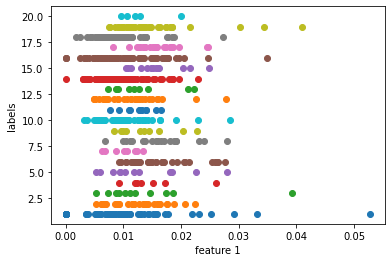

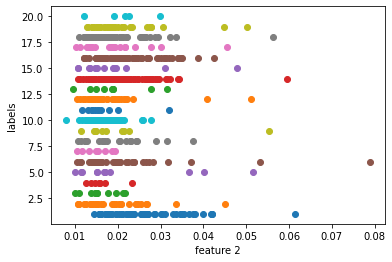

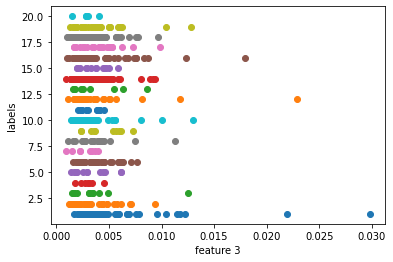

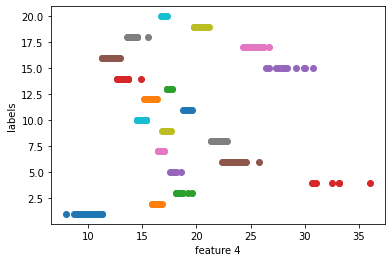

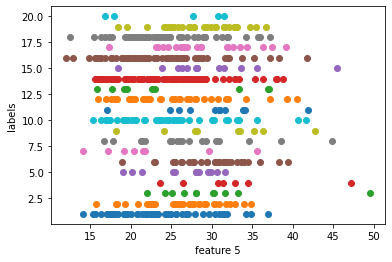

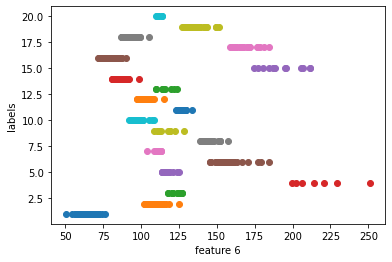

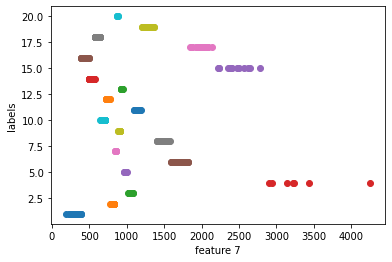

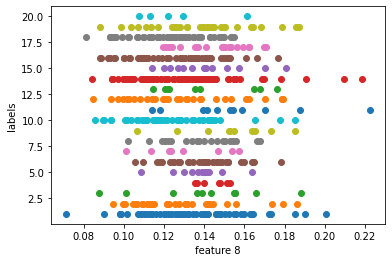

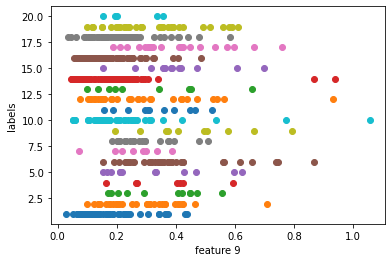

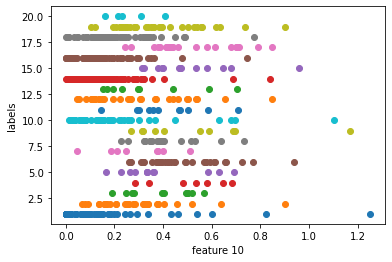

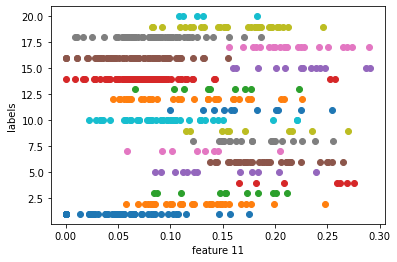

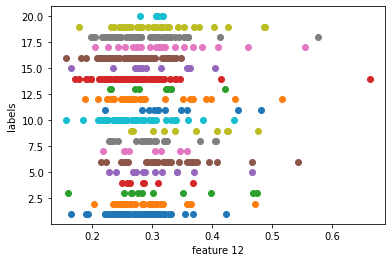

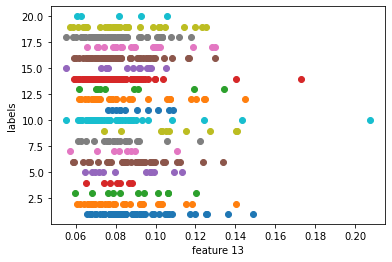

In [ ]:
for f in range(13):
  for label in range(1,21):
    plt.scatter(groups[label-1][:,f],np.ones(len(groups[label-1]))*label)
  plt.xlabel(f'feature {f+1}')
  plt.ylabel('labels')
  plt.show()